In [1]:
# %load_ext rpy2.ipython 
# import vamb
%config IPCompleter.greedy=False
%config Completer.use_jedi=False
# %load_ext rpy2.ipython
%matplotlib inline


In [1]:
import pickle
import numpy as np
import pandas as pd
import os
import glob
import requests
import webbrowser
# import xmltodict
import json
from itertools import compress
import re
import seaborn as sns
import plotly as pl
import matplotlib
import matplotlib.pyplot as plt
from Bio import SeqIO
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew
import plotly.io as pio
import plotly.express as px
import glob
pio.renderers.default = 'iframe_connected'
plt.rcParams['figure.figsize'] = [10, 10]

ModuleNotFoundError: No module named 'plotly'

In [2]:
from IPython.display import HTML

def View(df):
    css = """<style>
    table { border-collapse: collapse; border: 3px solid #eee; }
    table tr th:first-child { background-color: #eeeeee; color: #333; font-weight: bold }
    table thead th { background-color: #eee; color: #000; }
    tr, th, td { border: 1px solid #ccc; border-width: 1px 0 0 1px; border-collapse: collapse;
    padding: 3px; font-family: monospace; font-size: 10px }</style>
    """
    s  = '<script type="text/Javascript">'
    s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
    s += 'win.document.body.innerHTML = \'' + (df.to_html() + css).replace("\n",'\\') + '\';'
    s += '</script>'
    return(HTML(s+css))

In [14]:
!pwd

/mnt/storage/soil_institute/graphmb


In [5]:
!ls /mnt/storage/metagenome/rnf_c_new/dbcan3/

C1cgc.gff	C2diamond.out	C3hmmer.out	L1prodigal.gff	L2tf-1.out
C1cgc.out	C2eCAMI.out	C3overview.txt	L1stp.out	L2tf-2.out
C1diamond.out	C2hmmer.out	C3prodigal.gff	L1tf-1.out	L2tp.out
C1eCAMI.out	C2overview.txt	C3stp.out	L1tf-2.out	L2uniInput
C1hmmer.out	C2prodigal.gff	C3tf-1.out	L1tp.out	L3diamond.out
C1overview.txt	C2stp.out	C3tf-2.out	L1uniInput	L3eCAMI.out
C1prodigal.gff	C2tf-1.out	C3tp.out	L2cgc.gff	L3hmmer.out
C1stp.out	C2tf-2.out	C3uniInput	L2cgc.out	L3prodigal.gff
C1tf-1.out	C2tp.out	L1cgc.gff	L2diamond.out	L3stp.out
C1tf-2.out	C2uniInput	L1cgc.out	L2eCAMI.out	L3tf-1.out
C1tp.out	C3cgc.gff	L1diamond.out	L2hmmer.out	L3tf-2.out
C1uniInput	C3cgc.out	L1eCAMI.out	L2overview.txt	L3tp.out
C2cgc.gff	C3diamond.out	L1hmmer.out	L2prodigal.gff	L3uniInput
C2cgc.out	C3eCAMI.out	L1overview.txt	L2stp.out


In [11]:
!ls

Akkermansia_muciniphila_keggs
Alistipes_communis_keggs
Alistipes_putredinis_keggs
Alistipes_senegalensis_keggs
Anaerobutyricum_hallii_keggs
Bacteroides_eggerthii_keggs
Bacteroides_massiliensis_keggs
Bacteroides_stercoris_keggs
Bacteroides_uniformis_keggs
Barnesiella_intestinihominis_keggs
Bifidobacterium_adolescentis_keggs
Bifidobacterium_angulatum_DSM_20098_=_JCM_7096_keggs
Bifidobacterium_catenulatum_DSM_16992_=_JCM_1194_=_LMG_11043_keggs
Collinsella_aerofaciens_keggs
Dorea_longicatena_keggs
Eubacterium_rectale_keggs
Eubacterium_siraeum_keggs
Faecalibacterium_prausnitzii_keggs
HF
Lachnospira_eligens_keggs
Lachnospiraceae_bacterium_8_1_57FAA_keggs
MN
Parabacteroides_merdae_keggs
Phocaeicola_vulgatus_keggs
Roseburia_intestinalis_keggs
Ruminococcus_bromii_keggs
Ruminococcus_sp_5_1_39BFAA_keggs
Ruminococcus_torques_keggs
Segatella_copri_keggs
Sutterella_wadsworthensis_keggs
Untitled.ipynb
al.bam
al.bam.csi
assembly.fasta.split
assembly_depth.txt
assembly_graph.gfa
checkm_edges
checkm_edg

In [10]:
path = "/mnt/storage/metagenome/rnf_c_new/dbcan3/"
files = sorted(glob.glob(f"{path}/*cgc.out"))
files
# names = [os.path.basename(i).split(".")[0] for i in files]
# file_list = list(zip(names, files))
# files_into = sorted(glob.glob(f"{os.getcwd()}/filt_fastas/*"))
# counter = 0
# for i in file_list:
#     d = {}
#     buff = []
#     clstr_file = i[1]
#     with open(clstr_file) as clstr:
#         for cl in clstr.readlines():
#             a = cl.rstrip() 
#             if cl.startswith(">"):
#                 d[a] = []
#                 buff.append(a)
#             else:
#                 d[buff[-1]].append(a)


['/mnt/storage/metagenome/rnf_c_new/dbcan3/C1cgc.out',
 '/mnt/storage/metagenome/rnf_c_new/dbcan3/C2cgc.out',
 '/mnt/storage/metagenome/rnf_c_new/dbcan3/C3cgc.out',
 '/mnt/storage/metagenome/rnf_c_new/dbcan3/L1cgc.out',
 '/mnt/storage/metagenome/rnf_c_new/dbcan3/L2cgc.out']

## IS

## BINs

In [8]:
!ls --color /home/gladkovgpu/metagenome/rnf_c_new/semibin/semibin_results_3/checkm2/quality_report.tsv

/home/gladkovgpu/metagenome/rnf_c_new/semibin/semibin_results_3/checkm2/quality_report.tsv


In [132]:
dfcheck = pd.read_csv("/home/gladkovgpu/metagenome/rnf_c_new/semibin/semibin_results_3/checkm2/quality_report.tsv", delimiter='\t')
dfcheck2 = pd.read_csv("/home/gladkovgpu/metagenome/rnf_c_new/semibin/semibin_results_4/checkm2/quality_report.tsv", delimiter='\t')

In [6]:
dfcheck

,Name,Completeness_General,Contamination,Completeness_Specific,Completeness_Model_Used,Translation_Table_Used,Coding_Density,Contig_N50,Average_Gene_Length,Genome_Size,GC_Content,Total_Coding_Sequences,Additional_Notes
0,c1_bin.1,90.08,8.75,94.13,Gradient Boost (General Model),11,0.866,355576,294.321223,9158970,0.68,9028,NaN
1,c1_bin.114,53.48,0.26,59.55,Gradient Boost (General Model),11,0.838,33199,226.951927,3963478,0.60,4930,NaN
2,c1_bin.121,61.00,17.04,59.67,Neural Network (Specific Model),4,0.859,58867,399.729064,4790169,0.68,3451,NaN
3,c1_bin.126,33.38,0.70,30.42,Neural Network (Specific Model),11,0.791,39522,190.758973,2308065,0.72,3232,NaN
4,c1_bin.135,21.78,1.20,35.59,Neural Network (Specific Model),4,0.859,40905,296.073178,3383230,0.63,3307,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398,l3_bin.54,74.88,3.74,63.67,Gradient Boost (General Model),11,0.891,54843,221.998707,2860286,0.49,3866,NaN
2399,l3_bin.67,78.66,1.84,65.19,Gradient Boost (General Model),11,0.851,247193,219.207274,3287750,0.65,4289,NaN
2400,l3_bin.86,71.73,6.51,80.61,Gradient Boost (General Model),11,0.857,282235,234.276488,7210807,0.64,8872,NaN
2401,l3_bin.93,76.29,2.46,80.36,Gradient Boost (General Model),11,0.887,838422,280.948538,5392730,0.67,5713,NaN


In [7]:
len(dfcheck)

2403

In [67]:
df_good_1 = dfcheck.query('Completeness_General > 90 and Contamination < 5')
df_good_2 = dfcheck2.query('Completeness_General > 90 and Contamination < 5')
df_good

,Name,Completeness_General,Contamination,Completeness_Specific,Completeness_Model_Used,Translation_Table_Used,Coding_Density,Contig_N50,Average_Gene_Length,Genome_Size,GC_Content,Total_Coding_Sequences,Additional_Notes
7,c1_bin.16,90.31,3.20,85.52,Gradient Boost (General Model),11,0.902,1045870,297.027710,5219348,0.49,5305,NaN
55,c2_bin.24,96.86,3.08,88.20,Gradient Boost (General Model),11,0.907,3584096,300.194207,3584096,0.47,3625,NaN
142,l1_bin.3,93.73,3.08,81.97,Gradient Boost (General Model),11,0.878,628644,271.417613,4717185,0.40,5110,NaN
205,l3_bin.17,90.78,1.64,82.86,Gradient Boost (General Model),11,0.882,5157788,272.620647,5157788,0.69,5599,NaN
285,c1_bin.40,92.01,2.38,88.99,Neural Network (Specific Model),11,0.900,149691,273.193161,2942701,0.63,3246,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,l3_bin.11,94.48,2.45,85.16,Gradient Boost (General Model),11,0.862,1585484,289.304608,6365216,0.63,6359,NaN
2254,c1_bin.13,90.54,3.02,92.14,Gradient Boost (General Model),11,0.889,103193,285.108628,3991984,0.61,4161,NaN
2332,c3_bin.7,91.02,3.46,89.33,Neural Network (Specific Model),11,0.875,327310,247.887049,4030590,0.58,4772,NaN
2351,l2_bin.2,91.07,0.41,84.99,Neural Network (Specific Model),11,0.870,4081921,276.121404,4190129,0.66,4415,NaN


In [68]:
df_good_2

,Name,Completeness_General,Contamination,Completeness_Specific,Completeness_Model_Used,Translation_Table_Used,Coding_Density,Contig_N50,Average_Gene_Length,Genome_Size,GC_Content,Total_Coding_Sequences,Additional_Notes
35,c2_bin.0,100.00,0.03,100.00,Neural Network (Specific Model),11,0.885,4283521,359.097049,4283521,0.70,3524,NaN
36,c2_bin.10,90.54,0.45,93.48,Gradient Boost (General Model),11,0.880,413120,279.269502,3897899,0.65,4115,NaN
52,c2_bin.22,100.00,0.86,95.40,Gradient Boost (General Model),11,0.913,3410992,300.368345,3410992,0.65,3475,NaN
57,c2_bin.24,96.86,3.08,88.20,Gradient Boost (General Model),11,0.907,3584096,300.194207,3584096,0.47,3625,NaN
136,c3_bin.9,95.18,1.69,94.50,Gradient Boost (General Model),11,0.917,619231,282.291689,5197499,0.62,5667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,l3_bin.50,100.00,0.84,91.16,Gradient Boost (General Model),11,0.872,1675457,303.388143,6117653,0.64,5887,NaN
1995,l3_bin.6,90.37,3.11,85.15,Gradient Boost (General Model),11,0.863,3318589,258.398223,3318589,0.69,3714,NaN
2004,c1_bin.14,90.77,1.27,91.64,Gradient Boost (General Model),11,0.893,103193,286.485480,3866129,0.61,4029,NaN
2010,c1_bin.26,100.00,3.52,93.94,Neural Network (Specific Model),11,0.881,236525,292.406861,3906274,0.49,3935,NaN


In [75]:
df_good_1.Name.to_csv("/home/gladkovgpu/metagenome/rnf_c_new/semibin/gb_3.txt", index=False)

df_good_2.Name.to_csv("/home/gladkovgpu/metagenome/rnf_c_new/semibin/gb_4.txt", index=False)

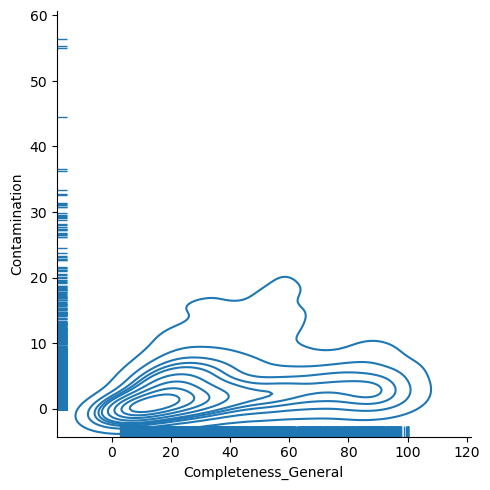

In [134]:
sns.displot(data=dfcheck, x="Completeness_General",y="Contamination",rug=True, kind="kde")

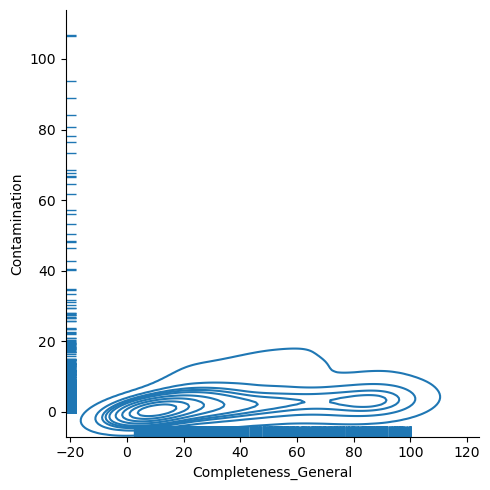

In [65]:
sns.displot(data=dfcheck2, x="Completeness_General",y="Contamination",rug=True, kind="kde")

<Axes: xlabel='Completeness_General', ylabel='Contamination'>

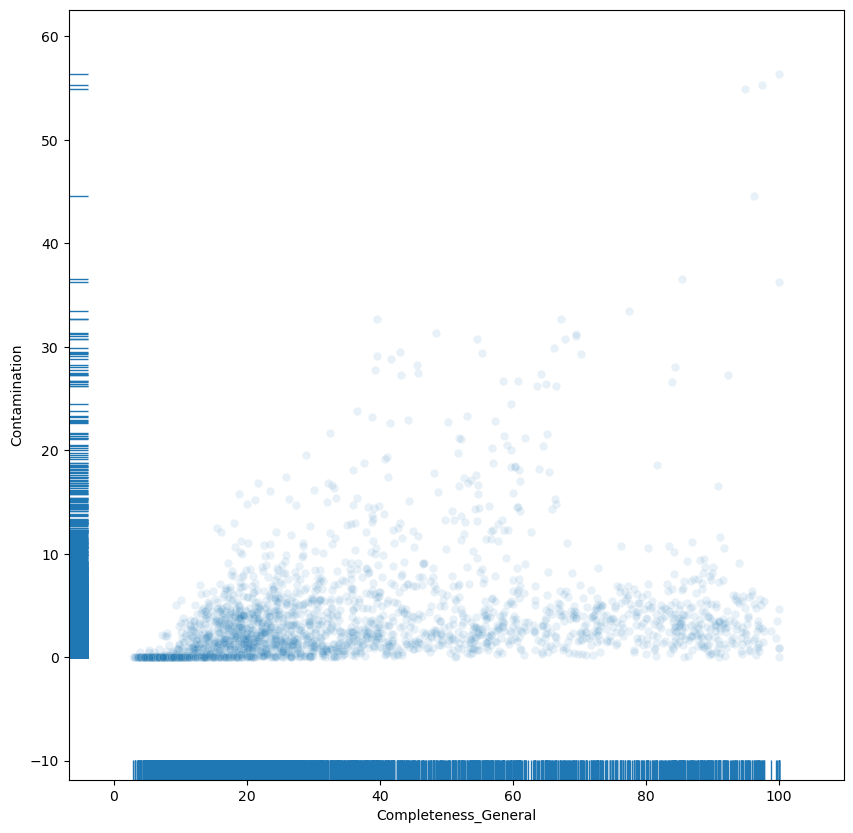

In [58]:
sns.scatterplot(data=dfcheck, x="Completeness_General",y="Contamination",alpha=.1)
sns.rugplot(data=dfcheck,x="Completeness_General",y="Contamination")

<Axes: xlabel='Completeness_General', ylabel='Contamination'>

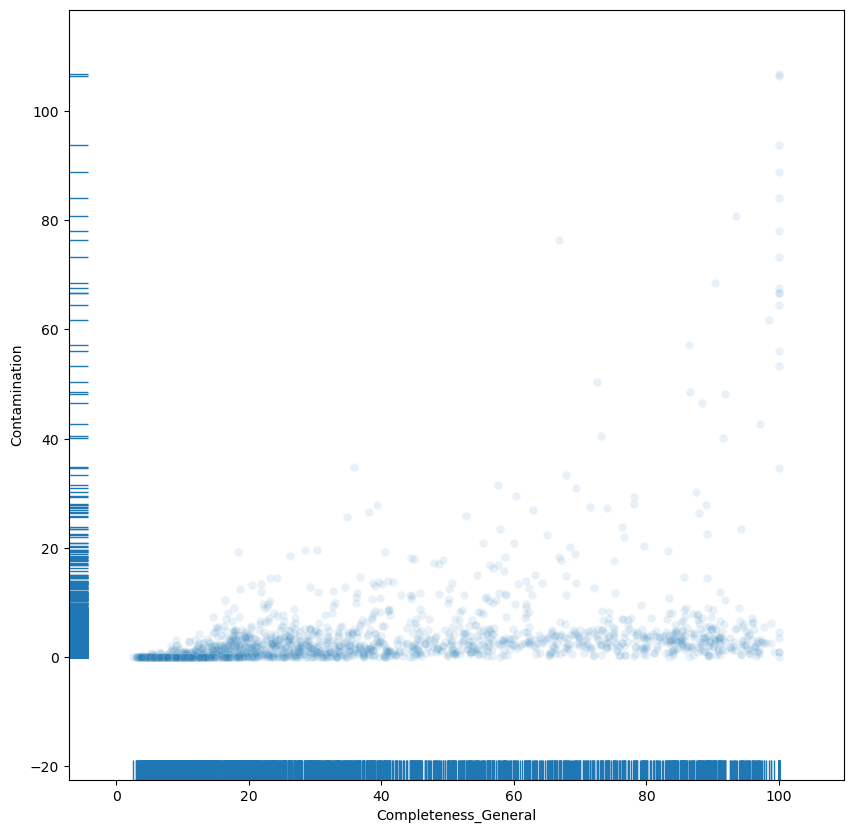

In [59]:
sns.scatterplot(data=dfcheck2, x="Completeness_General",y="Contamination",alpha=.1)
sns.rugplot(data=dfcheck2,x="Completeness_General",y="Contamination")

In [62]:
dfcheck.describe()

,Completeness_General,Contamination,Completeness_Specific,Translation_Table_Used,Coding_Density,Contig_N50,Average_Gene_Length,Genome_Size,GC_Content,Total_Coding_Sequences
count,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2.403000e+03,2403.000000,2.403000e+03,2403.000000,2403.000000
mean,36.125963,3.570745,40.237079,9.100707,0.813127,2.822490e+05,225.222215,4.032755e+06,0.628494,5002.913858
std,25.988122,5.181434,28.542650,3.113161,0.058655,8.667410e+05,72.060382,8.394374e+06,0.089076,8892.255038
min,2.890000,0.000000,0.000000,4.000000,0.279000,5.523000e+03,72.624988,2.017420e+05,0.240000,109.000000
25%,16.295000,0.490000,13.170000,4.000000,0.795000,2.123550e+04,171.068716,9.989195e+05,0.610000,1312.500000
50%,27.010000,2.110000,36.640000,11.000000,0.818000,4.307900e+04,213.510815,2.967818e+06,0.650000,3714.000000
75%,53.810000,4.470000,61.960000,11.000000,0.848000,1.778265e+05,272.161353,4.854472e+06,0.690000,6014.000000
max,100.000000,56.380000,100.000000,11.000000,0.933000,1.233437e+07,619.358621,1.792429e+08,0.760000,166390.000000


In [63]:
dfcheck2.describe()

,Completeness_General,Contamination,Completeness_Specific,Translation_Table_Used,Coding_Density,Contig_N50,Average_Gene_Length,Genome_Size,GC_Content,Total_Coding_Sequences
count,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2.089000e+03,2089.000000,2.089000e+03,2089.000000,2089.000000
mean,34.025874,3.220895,35.825807,9.545716,0.817983,3.648913e+05,229.563986,4.629365e+06,0.624677,5523.572044
std,28.650558,8.422803,31.153201,2.840583,0.059014,9.202368e+05,72.870216,1.736746e+07,0.090324,20378.902816
min,2.570000,0.000000,2.550000,4.000000,0.245000,3.281000e+03,80.007856,2.000510e+05,0.230000,91.000000
25%,9.610000,0.020000,6.810000,11.000000,0.799000,3.709900e+04,179.448101,3.970210e+05,0.600000,521.000000
50%,23.280000,0.960000,25.720000,11.000000,0.824000,1.154860e+05,220.748679,1.913325e+06,0.650000,2471.000000
75%,54.240000,3.190000,61.010000,11.000000,0.853000,2.808020e+05,268.437000,4.302174e+06,0.680000,5291.000000
max,100.000000,106.820000,100.000000,11.000000,0.928000,1.233437e+07,715.130000,3.909892e+08,0.760000,617314.000000


In [23]:
df_good['site'] = df_good.Name.str.split('_').str[0]

/tmp/ipykernel_156505/1920851892.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
df_good.groupby("site").count()['Name']

site
c1    11
c2    21
c3     7
l1     5
l2    19
l3    13
Name: Name, dtype: int64

In [ ]:
df_good

In [29]:
df_good.Name.

7       c1_bin.16
55      c2_bin.24
142      l1_bin.3
205     l3_bin.17
285     c1_bin.40
          ...    
2199    l3_bin.11
2254    c1_bin.13
2332     c3_bin.7
2351     l2_bin.2
2361     l2_bin.3
Name: Name, Length: 76, dtype: object

In [76]:
dfcheck_new_3 = pd.read_csv("~/metagenome/rnf_c_new/semibin/checkm2_3/quality_report.tsv", delimiter='\t')
dfcheck_new_4 = pd.read_csv("~/metagenome/rnf_c_new/semibin/checkm2_4/quality_report.tsv", delimiter='\t')


In [89]:
View(dfcheck_new_3.sort_values("Completeness_General"))

In [88]:
View(df_good_1.sort_values("Completeness_General"))

In [8]:
df_anno = pd.read_pickle('../../metagenome/rnf_c_new/bakta/df')

In [9]:
df_anno

,#query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,site
0,contig_1_0,700598.Niako_5238,0.000000e+00,1404.0,"COG1629@1|root,COG1629@2|Bacteria,4NDXS@976|Ba...",976|Bacteroidetes,P,CarboxypepD_reg-like domain,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CarbopepD_reg_2,Plug,TonB_dep_Rec",C1
1,contig_1_3,700598.Niako_5237,4.340000e-255,790.0,"COG1435@1|root,COG1435@2|Bacteria,4NHCM@976|Ba...",976|Bacteroidetes,F,SusD family,NaN,NaN,...,NaN,NaN,NaN,NaN,"ko00000,ko02000","8.A.46.1,8.A.46.3",NaN,NaN,"SusD-like_3,SusD_RagB",C1
2,contig_1_6,700598.Niako_5236,3.420000e-155,503.0,"28IBC@1|root,2Z8DV@2|Bacteria,4NQRQ@976|Bacter...",976|Bacteroidetes,S,Domain of unknown function (DUF5018),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DUF5018,C1
3,contig_1_5,700598.Niako_5235,2.440000e-198,623.0,"COG1649@1|root,COG1649@2|Bacteria,4PHU5@976|Ba...",976|Bacteroidetes,S,Domain of unknown function,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DUF4985,GHL10",C1
4,contig_1_8,714943.Mucpa_2717,3.390000e-110,364.0,"COG4632@1|root,COG4632@2|Bacteria,4NR1M@976|Ba...",976|Bacteroidetes,G,COGs COG4632 Exopolysaccharide biosynthesis pr...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Metallophos,NAGPA,fn3",C1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243952,contig_99999_2,234267.Acid_3577,8.550000e-174,560.0,"COG0249@1|root,COG0249@2|Bacteria,3Y48T@57723|...",57723|Acidobacteria,L,ATPase domain of DNA mismatch repair MUTS family,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MutS_III,MutS_V",L3
7243953,contig_99999_12,1267535.KB906767_gene5280,1.090000e-59,213.0,"COG1329@1|root,COG1329@2|Bacteria,3Y4ZG@57723|...",204432|Acidobacteriia,K,CarD-like/TRCF domain,NaN,NaN,...,NaN,NaN,NaN,NaN,"ko00000,ko03000",NaN,NaN,NaN,CarD_CdnL_TRCF,L3
7243954,contig_99999_5,1185876.BN8_01972,3.150000e-106,357.0,"COG4948@1|root,COG4948@2|Bacteria,4NGZF@976|Ba...",976|Bacteroidetes,M,mandelate racemase muconate lactonizing,NaN,NaN,...,"ko00051,ko01120,map00051,map01120",NaN,R03688,RC00543,"ko00000,ko00001,ko01000",NaN,NaN,NaN,"MR_MLE_C,MR_MLE_N",L3
7243955,contig_99999_3,1089547.KB913013_gene1278,4.130000e-147,474.0,"COG3458@1|root,COG3458@2|Bacteria,4NGH5@976|Ba...",976|Bacteroidetes,Q,PFAM Acetyl xylan esterase,axe7A_2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AXE1,L3


In [ ]:
df_anno.s

In [13]:
for i in df_anno["site"].unique().tolist():
    df_anno.loc[df_anno["site"] == i]["KEGG_ko"].dropna().str.split(",").explode().str[3:].to_csv(f"{i}_keggs", sep="\t")

In [15]:
!head L1_keggs

	KEGG_ko
3662645	K16247
3662648	K03527
3662649	K02204
3662650	K03469
3662652	K09946
3662653	K19746
3662654	K01048
3662655	K02278
3662656	K02279


In [27]:
for i in df_anno["site"].unique().tolist():
    print(i)

C1
C2
C3
L1
L2
L3


In [18]:
%%capture

for i in df_anno["site"].unique().tolist():
    !python /home/gladkovgpu/app/MinPath/MinPath.py -ko {i}_keggs -report result_minpath_site_{i} -details detailed_output_minpath_site_{i}

In [20]:
!ls

Akkermansia_muciniphila_keggs
Alistipes_communis_keggs
Alistipes_putredinis_keggs
Alistipes_senegalensis_keggs
Anaerobutyricum_hallii_keggs
Bacteroides_eggerthii_keggs
Bacteroides_massiliensis_keggs
Bacteroides_stercoris_keggs
Bacteroides_uniformis_keggs
Barnesiella_intestinihominis_keggs
Bifidobacterium_adolescentis_keggs
Bifidobacterium_angulatum_DSM_20098_=_JCM_7096_keggs
Bifidobacterium_catenulatum_DSM_16992_=_JCM_1194_=_LMG_11043_keggs
C1_keggs
C2_keggs
C3_keggs
Collinsella_aerofaciens_keggs
Dorea_longicatena_keggs
Eubacterium_rectale_keggs
Eubacterium_siraeum_keggs
Faecalibacterium_prausnitzii_keggs
HF
L1_keggs
L2_keggs
L3_keggs
Lachnospira_eligens_keggs
Lachnospiraceae_bacterium_8_1_57FAA_keggs
MN
Parabacteroides_merdae_keggs
Phocaeicola_vulgatus_keggs
Roseburia_intestinalis_keggs
Ruminococcus_bromii_keggs
Ruminococcus_sp_5_1_39BFAA_keggs
Ruminococcus_torques_keggs
Segatella_copri_keggs
Sutterella_wadsworthensis_keggs
Untitled.ipynb
al.bam
al.bam.csi
assembly.fasta.split
assembl

In [30]:
!ls

Akkermansia_muciniphila_keggs
Alistipes_communis_keggs
Alistipes_putredinis_keggs
Alistipes_senegalensis_keggs
Anaerobutyricum_hallii_keggs
Bacteroides_eggerthii_keggs
Bacteroides_massiliensis_keggs
Bacteroides_stercoris_keggs
Bacteroides_uniformis_keggs
Barnesiella_intestinihominis_keggs
Bifidobacterium_adolescentis_keggs
Bifidobacterium_angulatum_DSM_20098_=_JCM_7096_keggs
Bifidobacterium_catenulatum_DSM_16992_=_JCM_1194_=_LMG_11043_keggs
C1_keggs
C2_keggs
C3_keggs
Collinsella_aerofaciens_keggs
Dorea_longicatena_keggs
Eubacterium_rectale_keggs
Eubacterium_siraeum_keggs
Faecalibacterium_prausnitzii_keggs
HF
L1_keggs
L2_keggs
L3_keggs
Lachnospira_eligens_keggs
Lachnospiraceae_bacterium_8_1_57FAA_keggs
MN
Parabacteroides_merdae_keggs
Phocaeicola_vulgatus_keggs
Roseburia_intestinalis_keggs
Ruminococcus_bromii_keggs
Ruminococcus_sp_5_1_39BFAA_keggs
Ruminococcus_torques_keggs
Segatella_copri_keggs
Sutterella_wadsworthensis_keggs
Untitled.ipynb
al.bam
al.bam.csi
assembly.fasta.split
assembl

In [31]:
from pathlib import Path


path = r'/mnt/storage/soil_institute/graphmb/'
files = Path(path).glob('result_minpath_site_*')

dfs = list()
for f in files:
    data = pd.read_csv(f,sep="  ",engine='python', names=["hui0", "hui1", "hui2", "hui22", "fam0", "hui3", "fam_found", "hui5", "name"])
    data['site'] = f.stem
    dfs.append(data)

minpath = pd.concat(dfs, ignore_index=True)
minpath = minpath.drop(list(minpath.filter(regex='hui')), axis=1)
cols = minpath.columns.tolist()
cols = cols[-1:] + cols[:-1]
minpath = minpath[cols]
minpath["site"] = minpath["site"].str.split("_").str[3]
minpath = minpath.sort_values("site")
files = Path(path).glob('result_minpath_site_*')

dfs = list()
for f in files:
    data = pd.read_csv(f,sep="  ",engine='python', names=["hui0", "hui1", "hui2", "hui22", "fam0", "hui3", "fam_found", "hui5", "name"])
    data['site'] = f.stem
    dfs.append(data)

minpath = pd.concat(dfs, ignore_index=True)
minpath = minpath.drop(list(minpath.filter(regex='hui')), axis=1)
cols = minpath.columns.tolist()
cols = cols[-1:] + cols[:-1]
minpath = minpath[cols]
minpath["site"] = minpath["site"].str.split("_").str[3]
minpath = minpath.sort_values("site")
minpath

,site,fam0,fam_found,name
2660,C1,99,40,Fluid shear stress and atherosclerosis
2356,C1,22,18,Caprolactam degradation
2357,C1,38,13,Phenylpropanoid biosynthesis
2358,C1,27,2,Flavonoid biosynthesis
2359,C1,17,2,Isoflavonoid biosynthesis
...,...,...,...,...
301,L3,24,8,Circadian rhythm
302,L3,11,2,Circadian rhythm - fly
303,L3,27,10,Circadian rhythm - plant
292,L3,67,16,Th1 and Th2 cell differentiation


In [32]:
minpath["rel"] = minpath["fam_found"].div(minpath.groupby('site')["fam_found"].transform('sum'))
minpath["rel"] = minpath["rel"].transform(lambda x: round(x*100, 2))
min_sorted = minpath.sort_values("fam_found", ascending=False).groupby("site").head(3000)
min_sorted

,site,fam0,fam_found,name,rel
2391,C1,512,440,ABC transporters,2.47
2392,C1,495,438,Two-component system,2.46
619,C3,512,423,ABC transporters,2.21
620,C3,495,422,Two-component system,2.21
1946,C2,512,417,ABC transporters,2.34
...,...,...,...,...,...
575,C3,41,1,Monoterpenoid biosynthesis,0.01
1676,L1,26,1,Maturity onset diabetes of the young,0.01
1866,C2,27,1,Glycosphingolipid biosynthesis - lacto and neo...,0.01
2360,C1,15,1,Flavone and flavonol biosynthesis,0.01


In [37]:
View(min_sorted)

In [40]:
import plotly.express as px


fig = px.bar(min_sorted, x="site", y="rel", color="name", title="Minpath output")
fig.update_layout(barmode='stack', xaxis={'categoryorder':'array', 'categoryarray':['C1','C2','C3','L1', 'L2', 'L3']})
fig.update_layout(autosize=False,width=1200,height=1400)
fig.show()

In [ ]:

for i in df_anno["site"].unique().tolist():
    df_anno.loc[df_anno["site"] == i]["KEGG_ko"].dropna().str.split(",").explode().str[3:].to_csv(f"{i}_keggs", sep="\t")

In [ ]:
for i in df_anno["site"].unique().tolist():
    df_anno.loc[df_anno["site"] == i]["KEGG_ko"].dropna().str.split(",").explode().str[3:].to_csv(f"{i}_keggs", sep="\t")

In [54]:
dff = df_anno.dropna(subset=['CAZy'])
dff["CAZy"] = dff["CAZy"].str.split(",")
dff = dff.explode("CAZy")

/tmp/ipykernel_162460/3030015468.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
dff_caz = dff.copy()

In [60]:
dff_caz = dff_caz[["CAZy","site"]]
dff_caz

,CAZy,site
256,GT51,C1
265,GT51,C1
273,GT2,C1
345,GT19,C1
413,GH23,C1
...,...,...
7243669,GT4,L3
7243781,GH31,L3
7243791,AA10,L3
7243791,CBM73,L3


In [66]:
caz_counter = dff_caz.groupby(["site","CAZy"]).size()
caz_counter

site  CAZy 
C1    AA10     63
      AA13      2
      AA9      16
      CBM1     17
      CBM15    22
               ..
L3    PL12      2
      PL21      4
      PL4      50
      PL6       3
      PL8      55
Length: 834, dtype: int64

In [52]:
dff = df_anno.dropna(subset=['CAZy'])
dff["CAZy"].str.split(",").explode("CAZy")

0          GT51
1          GT51
2           GT2
3          GT19
4          GH23
          ...  
104836      GT4
104837     GH31
104838     AA10
104839    CBM73
104840      GT5
Name: CAZy, Length: 104841, dtype: object

### Bins again - round two

In [137]:
dfcheck_2 = pd.read_csv("/home/gladkovgpu/metagenome/rnf_c_new/semibin/checkm2_4_all/quality_report.tsv", delimiter='\t')

In [122]:
dfcheck_2['Completeness'] = np.where(dfcheck_2.Completeness_Model_Used == 'Gradient Boost (General Model)', dfcheck_2.Completeness_General, dfcheck_2.Completeness_Specific)

In [123]:
bins_hq = dfcheck_2.query('Completeness > 90 and Contamination < 5')
bins_hq.shape

(57, 14)

Based on: \
-- medium https://gtdb.ecogenomic.org/methods \
(completeness - 5*contamination, >50) \
-- hq https://www.nature.com/articles/nbt.3893

In [124]:
bins_medium = dfcheck_2.query('Completeness > 50 and Contamination < 10 & \
    Additional_Notes.isnull() & \
    Completeness - 5*Contamination > 50').sort_values('Genome_Size')
bins_medium.shape

(297, 14)

In [548]:
View(bins_medium)

<Axes: xlabel='Completeness', ylabel='Contamination'>

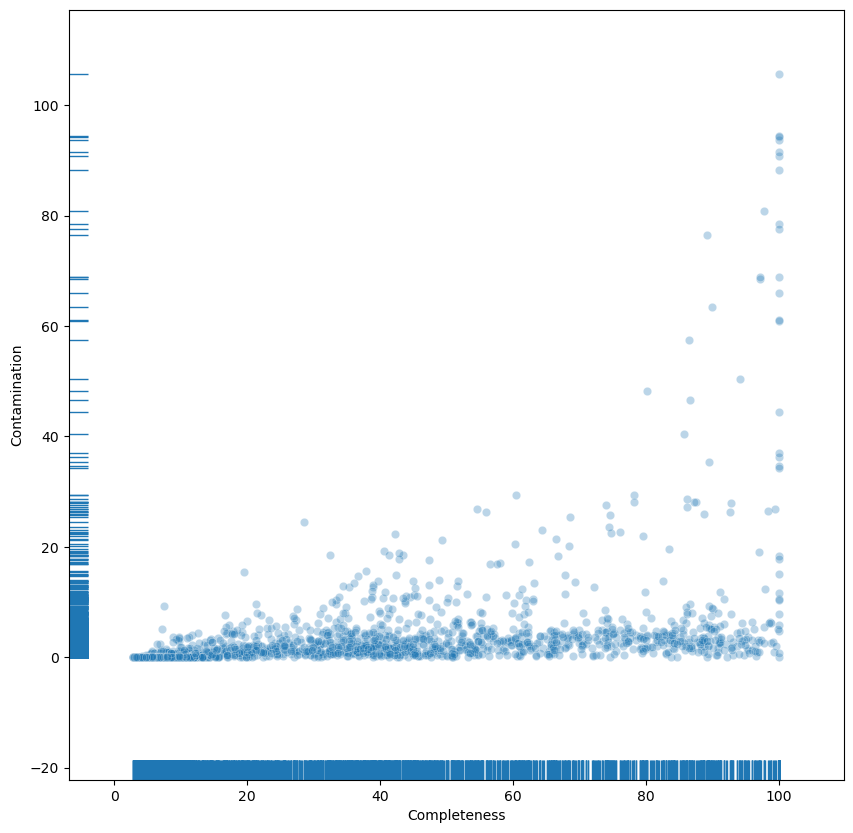

In [125]:
sns.scatterplot(data=dfcheck_2, x="Completeness",y="Contamination",alpha=.3)
sns.rugplot(data=dfcheck_2,x="Completeness",y="Contamination")

In [127]:
bins_hq.Name.to_csv("/home/gladkovgpu/metagenome/rnf_c_new/semibin/bins_hq.txt", index=False)
bins_medium.Name.to_csv("/home/gladkovgpu/metagenome/rnf_c_new/semibin/bins_medium.txt", index=False)

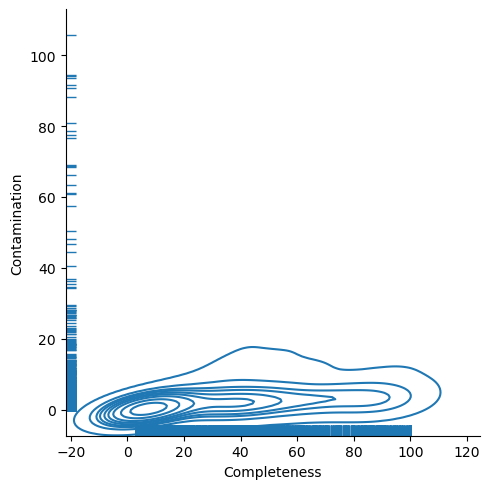

In [130]:
sns.displot(data=dfcheck_2, x="Completeness",y="Contamination",rug=True, kind="kde")

### Merge annotations

In [136]:
!ls

Akkermansia_muciniphila_keggs
Alistipes_communis_keggs
Alistipes_putredinis_keggs
Alistipes_senegalensis_keggs
Anaerobutyricum_hallii_keggs
Bacteroides_eggerthii_keggs
Bacteroides_massiliensis_keggs
Bacteroides_stercoris_keggs
Bacteroides_uniformis_keggs
Barnesiella_intestinihominis_keggs
Bifidobacterium_adolescentis_keggs
Bifidobacterium_angulatum_DSM_20098_=_JCM_7096_keggs
Bifidobacterium_catenulatum_DSM_16992_=_JCM_1194_=_LMG_11043_keggs
C1_keggs
C2_keggs
C3_keggs
Collinsella_aerofaciens_keggs
Dorea_longicatena_keggs
Eubacterium_rectale_keggs
Eubacterium_siraeum_keggs
Faecalibacterium_prausnitzii_keggs
HF
L1_keggs
L2_keggs
L3_keggs
Lachnospira_eligens_keggs
Lachnospiraceae_bacterium_8_1_57FAA_keggs
MN
Parabacteroides_merdae_keggs
Phocaeicola_vulgatus_keggs
Roseburia_intestinalis_keggs
Ruminococcus_bromii_keggs
Ruminococcus_sp_5_1_39BFAA_keggs
Ruminococcus_torques_keggs
Segatella_copri_keggs
Sutterella_wadsworthensis_keggs
Untitled.ipynb
al.bam
al.bam.csi
assembly.fasta.split
assembl

In [139]:
from pathlib import Path

In [400]:
path = f"/home/gladkovgpu/metagenome/rnf_c_new/semibin/anno"
files = sorted(glob.glob(f"{path}/*/*.emapper.annotations"))
forward = [re.search( r'[c,l][1-3]', f).group() for f in files]
reverse = [re.search( r'(?<=\.)\w+', os.path.basename(f)).group(0)  for f in files]
names = [f'{i[0]}_{i[1]}' for i in zip(forward, reverse)]
file_list = list(zip(names, files))

header = pd.read_csv(file_list[1][1],sep="\t", skiprows=4 ,nrows=0).columns.to_list()
dfs = [pd.read_csv(f[1], sep="\t", comment="#", header=None, names=header).assign(mag_id=f[0]) for f in file_list]
df_anno_mn = pd.concat(dfs, ignore_index=True)
df_anno_mn = df_anno_mn.assign(site=df_anno_mn['mag_id'].str.split("_").str[0])
df_anno_mn = df_anno_mn.replace('-', np.nan)
df_anno_mn

,#query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,mag_id,site
0,contig_15652_0,1095769.CAHF01000013_gene3183,1.290000e-278,859.0,"COG2804@1|root,COG2804@2|Bacteria,1MU7V@1224|P...",28216|Betaproteobacteria,NU,"Type II secretion system (T2SS), protein E, N-...",gspE1,NaN,...,M00331,NaN,NaN,"ko00000,ko00001,ko00002,ko02044",3.A.15,NaN,NaN,"T2SSE,T2SSE_N",c1_0,c1
1,contig_15652_3,1005048.CFU_2564,1.330000e-133,428.0,"COG0421@1|root,COG0421@2|Bacteria,1RBWW@1224|P...",28216|Betaproteobacteria,E,Spermidine synthase,speE,NaN,...,"M00034,M00133","R01920,R02869,R08359","RC00021,RC00053","ko00000,ko00001,ko00002,ko01000",NaN,NaN,NaN,Spermine_synth,c1_0,c1
2,contig_15652_1,1229205.BUPH_00566,1.330000e-277,865.0,"COG4772@1|root,COG4772@2|Bacteria,1MXJU@1224|P...",28216|Betaproteobacteria,P,TonB-dependent receptor,NaN,NaN,...,NaN,NaN,NaN,"ko00000,ko02000",1.B.14,NaN,NaN,"Plug,TonB_dep_Rec",c1_0,c1
3,contig_15652_6,1121943.KB899994_gene1050,3.610000e-112,365.0,"COG1028@1|root,COG1028@2|Bacteria,1MW9A@1224|P...",135619|Oceanospirillales,IQ,Short-chain dehydrogenase reductase SDR,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,adh_short_C2,c1_0,c1
4,contig_15652_9,204773.HEAR0763,8.020000e-68,235.0,"2DM8S@1|root,32731@2|Bacteria,1REFK@1224|Prote...",28216|Betaproteobacteria,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c1_0,c1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935834,contig_98423_24,1313421.JHBV01000010_gene4168,3.940000e-81,285.0,"COG1960@1|root,COG1960@2|Bacteria,4NFD4@976|Ba...",976|Bacteroidetes,I,"Acyl-CoA dehydrogenase, middle domain",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Acyl-CoA_dh_1,Acyl-CoA_dh_M,Acyl-CoA_dh_N,SCP2",l3_91,l3
935835,contig_98423_27,1408473.JHXO01000006_gene1192,1.140000e-66,242.0,"COG0628@1|root,COG0628@2|Bacteria,4NFHZ@976|Ba...",976|Bacteroidetes,F,"Psort location CytoplasmicMembrane, score 10.00",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AI-2E_transport,l3_91,l3
935836,contig_98423_47,1469557.JSWF01000019_gene327,2.410000e-19,99.4,"2EUFM@1|root,33MXW@2|Bacteria,4NZKZ@976|Bacter...",976|Bacteroidetes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l3_91,l3
935837,contig_98423_15,313606.M23134_03235,2.790000e-107,361.0,"COG3000@1|root,COG3000@2|Bacteria,4NFWX@976|Ba...",976|Bacteroidetes,I,PFAM Fatty acid hydroxylase,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FA_hydroxylase,l3_91,l3


In [159]:
View(df_anno_mn.head())

In [565]:
df_taxa_full = pd.read_csv("/home/gladkovgpu/metagenome/rnf_c_new/semibin/gtdb_medium/gtdbtk.bac120.summary.tsv", sep="\t")
View(df_taxa_full)

In [568]:
df_taxa = pd.read_csv("/home/gladkovgpu/metagenome/rnf_c_new/semibin/gtdb_medium/gtdbtk.bac120.summary.tsv", sep="\t")
df_taxa = df_taxa[["user_genome", "classification"]]
class_list = df_taxa["classification"].to_list()
returned_list = []
for i in [i.split(';') for i in class_list]:
    counter = -1
    res = None
    while res is None:
        try:
            res = re.search(r'(?<=__)[A-Z][a-z][A-z].*',i[counter]).group()
            returned_list.append(res)
        except AttributeError:
            counter-=1
            pass
df_taxa = df_taxa.assign(taxa_short=returned_list)
forward = [re.search( r'[c,l][1-3]', f).group() for f in df_taxa.user_genome]
reverse = [re.search( r'(?<=\.)\w+', f).group()  for f in df_taxa.user_genome]
df_taxa = df_taxa.assign(mag_id=[f'{i[0]}_{i[1]}' for i in zip(forward, reverse)])
df_taxa = df_taxa.drop("user_genome", axis=1)

In [570]:
View(df_taxa)

In [401]:
df_mags = df_anno_mn.merge(df_taxa, on='mag_id', how='left')

In [402]:
df_mags.to_pickle("~/metagenome/rnf_c_new/semibin/df_mags")

In [365]:
df_taxa

,classification,taxa_short,mag_id
0,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Noviherbaspirillum_B,c1_0
1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Ramlibacter,c1_103
2,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Parasegetibacter,c1_11
3,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Chitinophaga,c1_12
4,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Mucilaginibacter,c1_15
...,...,...,...
292,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,Roseomonas_D,l3_85
293,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,Vicinamibacterales,l3_87
294,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,Rhodomicrobiaceae,l3_88
295,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,Hyphomicrobiaceae,l3_9


In [448]:
count_vallinate = df_mags[df_mags.KEGG_ko.str.contains("K03862", na=False)].groupby("mag_id").count()["#query"]
df_heat = df_taxa.merge(count_vallinate, on='mag_id', how='left').rename(columns={"#query": "vallinate_monooxifenase"})

nfix_query = "|".join(['K02588', 'K02586','K02591','K00531','K22896','K22897','K22898', 'K22899'])
count_nfix = df_mags[df_mags.KEGG_ko.str.contains(nfix_query, na=False)].groupby("mag_id").count()["#query"]
df_heat = df_heat.merge(count_nfix, on='mag_id', how='left').rename(columns={"#query": "n_fixation"})

endonuclease_query = "|".join(['K01179', 'K20542'])
count_endonuclease = df_mags[df_mags.KEGG_ko.str.contains(endonuclease_query, na=False)].groupby("mag_id").count()["#query"]
df_heat = df_heat.merge(count_endonuclease, on='mag_id', how='left').rename(columns={"#query": "endogluconase"})

chitinase_query = "|".join(['GH18', 'GH19', 'GH20'])
count_chitinase = df_mags[df_mags.CAZy.str.contains(chitinase_query, na=False)].groupby("mag_id").count()["#query"]
df_heat = df_heat.merge(count_chitinase, on='mag_id', how='left').rename(columns={"#query": "chitinase"})

exocellulase_query = "|".join(['K01188', 'K05349', 'K05350'])
count_exocellulase = df_mags[df_mags.KEGG_ko.str.contains(exocellulase_query, na=False)].groupby("mag_id").count()["#query"]
df_heat = df_heat.merge(count_exocellulase, on='mag_id', how='left').rename(columns={"#query": "exocellulase"})

aa_query = "|".join(['AA1', 'AA2', 'AA3', 'AA6'])
count_aa = df_mags[df_mags.CAZy.str.contains(aa_query, na=False)].groupby("mag_id").count()["#query"]
df_heat = df_heat.merge(count_aa, on='mag_id', how='left').rename(columns={"#query": "AA"})

count_pectinase = df_mags[df_mags.CAZy.str.contains('GH28', na=False)].groupby("mag_id").count()["#query"]
df_heat = df_heat.merge(count_pectinase, on='mag_id', how='left').rename(columns={"#query": "pectinase"})

gum_query = "|".join(['GH145','GH88'])
count_gum = df_mags[df_mags.CAZy.str.contains(gum_query, na=False)].groupby("mag_id").count()["#query"]
df_heat = df_heat.merge(count_gum, on='mag_id', how='left').rename(columns={"#query": "gum"})

denitrification_query = "|".join(['K00370', 'K00371', 'K00374', 'K02567','K02568', 'K00368','K15864','K04561','K02305','K00376'])
count_denitrification = df_mags[df_mags.KEGG_ko.str.contains(denitrification_query, na=False)].groupby("mag_id").count()["#query"]
df_heat = df_heat.merge(count_denitrification, on='mag_id', how='left').rename(columns={"#query": "denitrification"})

sulfur_query = "|".join(['K13811','K00958','K00860','K00955','K00957','K00956','K00957','K00860', 'K00390', 'K05907', 'K00380', 'K00381', 'K00392'])
count_sulfur = df_mags[df_mags.KEGG_ko.str.contains(sulfur_query, na=False)].groupby("mag_id").count()["#query"]
df_heat = df_heat.merge(count_sulfur, on='mag_id', how='left').rename(columns={"#query": "sulfur"})

count_CBM = df_mags[df_mags.CAZy.str.contains('CBM', na=False)].groupby("mag_id").count()["#query"]
df_heat = df_heat.merge(count_CBM, on='mag_id', how='left').rename(columns={"#query": "CBM"})

count_GH = df_mags[df_mags.CAZy.str.contains('GH', na=False)].groupby("mag_id").count()["#query"]
df_heat = df_heat.merge(count_GH, on='mag_id', how='left').rename(columns={"#query": "GH"})

# methane monooxygenase 'K16157','K16158','K16159','K16161'
methaneoxyg_query = "|".join(['K16157','K16158','K16159','K16161'])
count_methaneoxyg = df_mags[df_mags.KEGG_ko.str.contains(methaneoxyg_query, na=False)].groupby("mag_id").count()["#query"]
df_heat = df_heat.merge(count_methaneoxyg, on='mag_id', how='left').rename(columns={"#query": "methane_monooxygenase"})

#  'K00200','K00201','K00202','K00203','K11261','K00205','K11260','K00204','K00672','K01499','K00319','K13942','K00320','K00577','K00578','K00579','K00580','K00581','K00582','K00583','K00584','K00399','K00401','K00402','K22480','K22481','K22482','K03388','K03389','K03390','K08264','K08265','K03388','K03389','K03390','K14127','K14126','K14128','K22516','K00125'
# methanotrophy_query = "|".join(['K00200','K00201','K00202','K00203','K11261','K00205','K11260','K00204','K00672','K01499','K00319','K13942','K00320','K00577','K00578','K00579','K00580','K00581','K00582','K00583','K00584','K00399','K00401','K00402','K22480','K22481','K22482','K03388','K03389','K03390','K08264','K08265','K03388','K03389','K03390','K14127','K14126','K14128','K22516','K00125'])
# count_methanotrophy = df_mags[df_mags.KEGG_ko.str.contains(methanotrophy_query, na=False)].groupby("mag_id").count()["#query"]
# df_heat = df_heat.merge(count_methanotrophy, on='mag_id', how='left').rename(columns={"#query": "methanotrophy"})

# formylmethanofuran dehydrogenase
methanotrophy_query = "|".join(['K00200','K00201','K00202','K00203','K11261'])
count_methanotrophy = df_mags[df_mags.KEGG_ko.str.contains(methanotrophy_query, na=False)].groupby("mag_id").count()["#query"]
df_heat = df_heat.merge(count_methanotrophy, on='mag_id', how='left').rename(columns={"#query": "methanotrophy"})

In [480]:
# formylmethanofuran dehydrogenase
methanotrophy_query = "|".join(['K00200','K00201','K00202','K00203','K11261'])
met = df_mags[df_mags.KEGG_ko.str.contains(methanotrophy_query, na=False)]
View(met)

In [451]:
View(df_heat)

In [450]:
df_heat.to_csv("/home/gladkovgpu/metagenome/rnf_c_new/semibin/heat_mags.txt", index=False) 

In [436]:
df_met = df_mags[df_mags.KEGG_ko.str.contains(methanotrophy_query, na=False)]

### Use DRAM distill annotation table

In [587]:
df_dram = pd.read_csv("/home/gladkovgpu/metagenome/rnf_c_new/semibin/function_heatmap_form.tsv", sep="\t")
df_dram

,category,subcategory,function_name,function_ids,long_function_name,gene_symbol
0,CAZy,CAZy,Polyphenolics,"K05909, AA1, AA2, K00422",Polyphenolics Cleavage,NaN
1,CAZy,CAZy,Crystalline Cellulose,"GH7, GH48, AA10, AA15, AA16, AA9, AA10, AA11, ...",Crystalline Cellulose Backbone Cleavage,NaN
2,CAZy,CAZy,Amorphous Cellulose,"GH5, GH6, GH7, GH8, GH9, GH10, GH124, GH12, GH...",Amorphous Cellulose Backbone Cleavage,NaN
3,CAZy,CAZy,Amorphous Cellulose,"GH94, GH1, GH2, GH3, GH5, GH9, GH16, GH116",Amorphous Cellulose Oligo Cleavage,NaN
4,CAZy,CAZy,Mucin,GH101,Mucin Backbone Cleavage,NaN
...,...,...,...,...,...,...
94,ETC,ETC,Cytochrome o ubiquinol oxidase,"K02297,K02298,K02299,K02300",Complex IV Low affinity,NaN
95,ETC,ETC,"F-type ATPase, prokaryotes and chloroplasts","K02111,K02112,K02113,K02114,K02115,K02108,K021...",Complex V,NaN
96,ETC,ETC,"F-type ATPase, eukaryotes","K02132,K02133,K02136,K02134,K02135,K02137,K021...",Complex V,NaN
97,ETC,ETC,"V/A-type ATPase, prokaryotes","K02117,K02118,K02119,K02120,K02121,K02122,K021...",Complex V,NaN


In [588]:
View(df_taxa)

In [589]:
View(df_dram)

In [460]:
(df_mags.count() / df_mags.count()[0] * 100).round()

#query            100.0
seed_ortholog     100.0
evalue            100.0
score             100.0
eggNOG_OGs        100.0
max_annot_lvl     100.0
COG_category       96.0
Description        96.0
Preferred_name     37.0
GOs                 8.0
EC                 30.0
KEGG_ko            56.0
KEGG_Pathway       34.0
KEGG_Module        23.0
KEGG_Reaction      23.0
KEGG_rclass        23.0
BRITE              56.0
KEGG_TC            11.0
CAZy                1.0
BiGG_Reaction       1.0
PFAMs              94.0
mag_id            100.0
site              100.0
classification    100.0
taxa_short        100.0
dtype: float64

In [462]:
df_mags[df_mags.EC.str.contains('1.14.99.39', na=False)].groupby("mag_id").count()

,#query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,site,classification,taxa_short
mag_id,,,,,,,,,,,,,,,,,,,,,
c3_5,2,2,2,2,2,2,2,2,0,2,...,2,2,2,0,0,0,2,2,2,2


In [590]:
df_heatdram = pd.DataFrame(columns = ['mags_id'] + df_dram.function_name.to_list())
df_heatdram

,mags_id,Polyphenolics,Crystalline Cellulose,Amorphous Cellulose,Amorphous Cellulose,Mucin,Mucin,Sulf-Polysachharides,Sulf-Polysachharides,Xyloglucan,...,Cytochrome bd ubiquinol oxidase,"Cytochrome c oxidase, cbb3-type",Cytochrome c oxidase,"Cytochrome c oxidase, prokaryotes",Cytochrome aa3-600 menaquinol oxidase,Cytochrome o ubiquinol oxidase,"F-type ATPase, prokaryotes and chloroplasts","F-type ATPase, eukaryotes","V/A-type ATPase, prokaryotes","V-type ATPase, eukaryotes"


In [591]:
df_heatdram = pd.DataFrame(columns = ['mag_id'] + df_dram.function_name.to_list())
for i in df_mags["mag_id"].unique().tolist():
    mag_df = df_mags.loc[df_mags["mag_id"] == i]
    new_row = [i]
    for index, row in df_dram.iterrows():
        count_res = 0
        for a in row['function_ids'].split(','):
            pattern = a.rstrip().lstrip()
            base_pattern = re.search(r'[A-Z]', a.rstrip().lstrip()).group(0)
            if base_pattern in ['K']:
                counter= mag_df[mag_df.KEGG_ko.str.contains(pattern, na=False)].count()["#query"]
                count_res+=counter
            if base_pattern in ['G','L','P','A']:
                counter = mag_df[mag_df.CAZy.str.contains(pattern, na=False)].count()["#query"]
                count_res+=counter
            if base_pattern in ['E']:
                pattern_mod = re.search( r'(?<=EC:).*', pattern).group() 
                counter = mag_df[mag_df.EC.str.contains(pattern_mod, na=False)].count()["#query"]
                count_res+=counter
        new_row.append(count_res)
    a_series = pd.Series(new_row, index = df_heatdram.columns)
    df_heatdram = df_heatdram._append(a_series, ignore_index=True)

In [594]:
df_heatdram

,mag_id,Polyphenolics,Crystalline Cellulose,Amorphous Cellulose,Amorphous Cellulose,Mucin,Mucin,Sulf-Polysachharides,Sulf-Polysachharides,Xyloglucan,...,Cytochrome bd ubiquinol oxidase,"Cytochrome c oxidase, cbb3-type",Cytochrome c oxidase,"Cytochrome c oxidase, prokaryotes",Cytochrome aa3-600 menaquinol oxidase,Cytochrome o ubiquinol oxidase,"F-type ATPase, prokaryotes and chloroplasts","F-type ATPase, eukaryotes","V/A-type ATPase, prokaryotes","V-type ATPase, eukaryotes"
0,c1_0,0,0,2,3,0,0,0,0,0,...,2,0,4,8,0,3,6,1,0,0
1,c1_103,0,1,4,10,0,0,0,0,2,...,1,3,4,10,0,4,1,0,0,0
2,c1_11,0,2,22,58,0,6,0,0,17,...,2,3,2,4,0,0,8,0,0,0
3,c1_12,0,1,33,90,0,11,1,1,29,...,2,3,3,5,0,0,8,0,0,0
4,c1_15,0,0,4,14,0,3,0,0,4,...,2,2,2,4,0,0,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,l3_85,0,1,4,14,0,0,0,0,1,...,5,1,4,12,0,4,9,0,1,0
293,l3_87,0,2,5,14,0,1,0,1,1,...,0,0,1,5,0,1,13,0,0,0
294,l3_88,0,0,4,7,0,0,0,0,2,...,2,3,2,5,0,1,8,0,0,0
295,l3_9,0,0,2,5,0,0,0,0,0,...,1,3,3,3,0,0,8,0,0,0


In [595]:
df_heatdramexport = df_heatdram.merge(df_taxa, on='mag_id', how='left')
df_heatdramexport

,mag_id,Polyphenolics,Crystalline Cellulose,Amorphous Cellulose,Amorphous Cellulose,Mucin,Mucin,Sulf-Polysachharides,Sulf-Polysachharides,Xyloglucan,...,Cytochrome c oxidase,"Cytochrome c oxidase, prokaryotes",Cytochrome aa3-600 menaquinol oxidase,Cytochrome o ubiquinol oxidase,"F-type ATPase, prokaryotes and chloroplasts","F-type ATPase, eukaryotes","V/A-type ATPase, prokaryotes","V-type ATPase, eukaryotes",classification,taxa_short
0,c1_0,0,0,2,3,0,0,0,0,0,...,4,8,0,3,6,1,0,0,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Noviherbaspirillum_B
1,c1_103,0,1,4,10,0,0,0,0,2,...,4,10,0,4,1,0,0,0,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Ramlibacter
2,c1_11,0,2,22,58,0,6,0,0,17,...,2,4,0,0,8,0,0,0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Parasegetibacter
3,c1_12,0,1,33,90,0,11,1,1,29,...,3,5,0,0,8,0,0,0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Chitinophaga
4,c1_15,0,0,4,14,0,3,0,0,4,...,2,4,0,0,8,0,0,0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Mucilaginibacter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,l3_85,0,1,4,14,0,0,0,0,1,...,4,12,0,4,9,0,1,0,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,Roseomonas_D sp000245075
293,l3_87,0,2,5,14,0,1,0,1,1,...,1,5,0,1,13,0,0,0,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,Vicinamibacterales
294,l3_88,0,0,4,7,0,0,0,0,2,...,2,5,0,1,8,0,0,0,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,Rhodomicrobiaceae
295,l3_9,0,0,2,5,0,0,0,0,0,...,3,3,0,0,8,0,0,0,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,Hyphomicrobiaceae


In [596]:
df_heatdramexport.to_csv("/home/gladkovgpu/metagenome/rnf_c_new/semibin/heat_mags2.txt", index=False) 

In [454]:
!ls /home/gladkovgpu/metagenome/rnf_c_new/semibin/

al.fasta		  function_heatmap_form.tsv  medaka.sh
ani.txt			  gb_3.txt		     medaka_2.log
ani_mat			  gb_3_path.txt		     medaka_consensus_3
ani_mat.matrix		  gb_4.txt		     medaka_consensus_4
ani_test		  gb_4_path.txt		     medaka_consensus_4_all
anno			  gtdb_medium		     out.test
barrnap			  h_bins		     script.sh
bins_4_all		  h_bins_3		     script.sh.save
bins_hq.txt		  h_bins_4		     semibin_5
bins_medium		  heat_mags.txt		     semibin_results
bins_medium.txt		  in			     semibin_results_2
checkm2_3		  log.log		     semibin_results_3
checkm2_4		  log2.log		     semibin_results_4
checkm2_4_all		  log3.log		     test.fasta
df_mags			  log4.log		     test_ani
emappertmp_dmdn_fn3ewq8i  medaka.log


### For full metagenome

In [575]:
df_anno.head()

,#query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,site
0,contig_1_0,700598.Niako_5238,0.000000e+00,1404.0,"COG1629@1|root,COG1629@2|Bacteria,4NDXS@976|Ba...",976|Bacteroidetes,P,CarboxypepD_reg-like domain,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CarbopepD_reg_2,Plug,TonB_dep_Rec",C1
1,contig_1_3,700598.Niako_5237,4.340000e-255,790.0,"COG1435@1|root,COG1435@2|Bacteria,4NHCM@976|Ba...",976|Bacteroidetes,F,SusD family,NaN,NaN,...,NaN,NaN,NaN,NaN,"ko00000,ko02000","8.A.46.1,8.A.46.3",NaN,NaN,"SusD-like_3,SusD_RagB",C1
2,contig_1_6,700598.Niako_5236,3.420000e-155,503.0,"28IBC@1|root,2Z8DV@2|Bacteria,4NQRQ@976|Bacter...",976|Bacteroidetes,S,Domain of unknown function (DUF5018),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DUF5018,C1
3,contig_1_5,700598.Niako_5235,2.440000e-198,623.0,"COG1649@1|root,COG1649@2|Bacteria,4PHU5@976|Ba...",976|Bacteroidetes,S,Domain of unknown function,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DUF4985,GHL10",C1
4,contig_1_8,714943.Mucpa_2717,3.390000e-110,364.0,"COG4632@1|root,COG4632@2|Bacteria,4NR1M@976|Ba...",976|Bacteroidetes,G,COGs COG4632 Exopolysaccharide biosynthesis pr...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Metallophos,NAGPA,fn3",C1


In [592]:
df_heatdram_full = pd.DataFrame(columns = ['site_id'] + df_dram.function_name.to_list())
for i in df_anno["site"].unique().tolist():
    mag_df = df_anno.loc[df_anno["site"] == i]
    new_row = [i]
    count_all = df_anno.count()["#query"]
    for index, row in df_dram.iterrows():
        count_res = 0
        for a in row['function_ids'].split(','):
            pattern = a.rstrip().lstrip()
            base_pattern = re.search(r'[A-Z]', a.rstrip().lstrip()).group(0)
            if base_pattern in ['K']:
                counter= mag_df[mag_df.KEGG_ko.str.contains(pattern, na=False)].count()["#query"]
                count_res+=counter
            if base_pattern in ['G','L','P','A']:
                counter = mag_df[mag_df.CAZy.str.contains(pattern, na=False)].count()["#query"]
                count_res+=counter
            if base_pattern in ['E']:
                pattern_mod = re.search( r'(?<=EC:).*', pattern).group() 
                counter = mag_df[mag_df.EC.str.contains(pattern_mod, na=False)].count()["#query"]
                count_res+=counter
        new_row.append(count_res / count_all * 100)
    a_series = pd.Series(new_row, index = df_heatdram_full.columns) 
    df_heatdram_full = df_heatdram_full._append(a_series, ignore_index=True)

In [597]:
df_heatdram_full.to_csv("/home/gladkovgpu/metagenome/rnf_c_new/semibin/heat_all.txt", index=False) 
df_heatdram_full

,site_id,Polyphenolics,Crystalline Cellulose,Amorphous Cellulose,Amorphous Cellulose,Mucin,Mucin,Sulf-Polysachharides,Sulf-Polysachharides,Xyloglucan,...,Cytochrome bd ubiquinol oxidase,"Cytochrome c oxidase, cbb3-type",Cytochrome c oxidase,"Cytochrome c oxidase, prokaryotes",Cytochrome aa3-600 menaquinol oxidase,Cytochrome o ubiquinol oxidase,"F-type ATPase, prokaryotes and chloroplasts","F-type ATPase, eukaryotes","V/A-type ATPase, prokaryotes","V-type ATPase, eukaryotes"
0,C1,0.000911,0.004818,0.048993,0.112866,0.000400,0.008807,0.001477,0.000883,0.034926,...,0.007482,0.009498,0.011458,0.018484,0.000718,0.004832,0.028382,0.002775,0.001284,0.000828
1,C2,0.000745,0.005301,0.049904,0.112301,0.000414,0.006447,0.001132,0.000759,0.037065,...,0.005977,0.009484,0.012562,0.024931,0.000345,0.005039,0.032399,0.002954,0.000814,0.000580
2,C3,0.000663,0.005052,0.049559,0.108905,0.000456,0.005494,0.001173,0.000994,0.036775,...,0.005080,0.009677,0.012852,0.025276,0.000276,0.004928,0.034360,0.003644,0.001891,0.000911
3,L1,0.000359,0.002374,0.018885,0.055053,0.000083,0.004983,0.000456,0.000387,0.012590,...,0.003948,0.002775,0.007565,0.008393,0.000110,0.003617,0.013377,0.002264,0.000055,0.000497
4,L2,0.000842,0.005080,0.050401,0.117160,0.000248,0.007247,0.001960,0.000828,0.036306,...,0.007993,0.010064,0.013294,0.024393,0.000248,0.006033,0.034401,0.002374,0.000483,0.000497
5,L3,0.000745,0.004914,0.056033,0.126588,0.000400,0.007358,0.001767,0.001035,0.040392,...,0.007372,0.010450,0.015226,0.027720,0.000304,0.005660,0.039840,0.002899,0.000580,0.000304


In [8]:
df_heatdram_full = pd.read_csv("/home/gladkov2/storage/metagenome/rnf_c_new/semibin/heat_all.txt") 
View(df_heatdram_full)

In [599]:
bins_medium

,Name,Completeness_General,Contamination,Completeness_Specific,Completeness_Model_Used,Translation_Table_Used,Coding_Density,Contig_N50,Average_Gene_Length,Genome_Size,GC_Content,Total_Coding_Sequences,Additional_Notes,Completeness
295,c2_bin.104,58.50,1.27,59.77,Gradient Boost (General Model),11,0.813,91547,167.693396,647662,0.53,1060,NaN,58.50
431,l2_bin.39,95.28,1.32,94.53,Gradient Boost (General Model),11,0.862,655661,245.155642,655661,0.59,771,NaN,95.28
1241,l3_bin.74,85.42,2.92,78.69,Gradient Boost (General Model),11,0.849,839347,212.303730,839347,0.57,1126,NaN,85.42
595,c2_bin.61,77.91,4.65,71.81,Gradient Boost (General Model),11,0.811,888491,175.486827,1122312,0.43,1746,NaN,77.91
155,l2_bin.0,86.76,1.60,89.52,Gradient Boost (General Model),11,0.917,1865418,278.794447,1865418,0.54,2053,NaN,86.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,l3_bin.21,90.81,3.59,94.01,Gradient Boost (General Model),11,0.867,448705,342.638032,9907129,0.69,8393,NaN,90.81
592,c2_bin.41,59.86,1.83,65.67,Neural Network (Specific Model),11,0.831,2657858,252.272351,10480034,0.70,11599,NaN,65.67
1285,c1_bin.4,89.38,3.31,95.10,Neural Network (Specific Model),11,0.897,221196,358.145793,10589690,0.70,8855,NaN,95.10
16,c1_bin.23,79.75,3.53,86.32,Gradient Boost (General Model),11,0.824,94417,245.785635,11152667,0.69,12572,NaN,79.75


In [600]:
df_heatdram

,mag_id,Polyphenolics,Crystalline Cellulose,Amorphous Cellulose,Amorphous Cellulose,Mucin,Mucin,Sulf-Polysachharides,Sulf-Polysachharides,Xyloglucan,...,Cytochrome bd ubiquinol oxidase,"Cytochrome c oxidase, cbb3-type",Cytochrome c oxidase,"Cytochrome c oxidase, prokaryotes",Cytochrome aa3-600 menaquinol oxidase,Cytochrome o ubiquinol oxidase,"F-type ATPase, prokaryotes and chloroplasts","F-type ATPase, eukaryotes","V/A-type ATPase, prokaryotes","V-type ATPase, eukaryotes"
0,c1_0,0,0,2,3,0,0,0,0,0,...,2,0,4,8,0,3,6,1,0,0
1,c1_103,0,1,4,10,0,0,0,0,2,...,1,3,4,10,0,4,1,0,0,0
2,c1_11,0,2,22,58,0,6,0,0,17,...,2,3,2,4,0,0,8,0,0,0
3,c1_12,0,1,33,90,0,11,1,1,29,...,2,3,3,5,0,0,8,0,0,0
4,c1_15,0,0,4,14,0,3,0,0,4,...,2,2,2,4,0,0,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,l3_85,0,1,4,14,0,0,0,0,1,...,5,1,4,12,0,4,9,0,1,0
293,l3_87,0,2,5,14,0,1,0,1,1,...,0,0,1,5,0,1,13,0,0,0
294,l3_88,0,0,4,7,0,0,0,0,2,...,2,3,2,5,0,1,8,0,0,0
295,l3_9,0,0,2,5,0,0,0,0,0,...,1,3,3,3,0,0,8,0,0,0


In [605]:
df_taxa

,classification,taxa_short,mag_id
0,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Noviherbaspirillum_B,c1_0
1,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Ramlibacter,c1_103
2,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Parasegetibacter,c1_11
3,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Chitinophaga,c1_12
4,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Mucilaginibacter,c1_15
...,...,...,...
292,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,Roseomonas_D sp000245075,l3_85
293,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,Vicinamibacterales,l3_87
294,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,Rhodomicrobiaceae,l3_88
295,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,Hyphomicrobiaceae,l3_9


In [612]:
bins_medium.Name

295     c2_bin.104
431      l2_bin.39
1241     l3_bin.74
595      c2_bin.61
155       l2_bin.0
           ...    
955      l3_bin.21
592      c2_bin.41
1285      c1_bin.4
16       c1_bin.23
1974     l3_bin.25
Name: Name, Length: 297, dtype: object

In [623]:
bins_medium_join = bins_medium.copy()

forward = [re.search( r'[c,l][1-3]', f).group() for f in bins_medium.Name]
reverse = [re.search( r'(?<=\.)\w+', f).group()  for f in bins_medium.Name]
bins_medium_join = bins_medium_join.assign(mag_id=[f'{i[0]}_{i[1]}' for i in zip(forward, reverse)])
bins_medium_join = bins_medium_join[['mag_id', 'Completeness', 'GC_Content', 'Contig_N50', 'Genome_Size']]

bins_medium_join

,mag_id,Completeness,GC_Content,Contig_N50,Genome_Size
295,c2_104,58.50,0.53,91547,647662
431,l2_39,95.28,0.59,655661,655661
1241,l3_74,85.42,0.57,839347,839347
595,c2_61,77.91,0.43,888491,1122312
155,l2_0,86.76,0.54,1865418,1865418
...,...,...,...,...,...
955,l3_21,90.81,0.69,448705,9907129
592,c2_41,65.67,0.70,2657858,10480034
1285,c1_4,95.10,0.70,221196,10589690
16,c1_23,79.75,0.69,94417,11152667


In [628]:
df_heatdrambinsstatexport = df_heatdramexport.copy()
df_heatdrambinsstatexport = df_heatdrambinsstatexport.merge(bins_medium_join, on='mag_id', how='left')


,mag_id,Polyphenolics,Crystalline Cellulose,Amorphous Cellulose,Amorphous Cellulose,Mucin,Mucin,Sulf-Polysachharides,Sulf-Polysachharides,Xyloglucan,...,"F-type ATPase, prokaryotes and chloroplasts","F-type ATPase, eukaryotes","V/A-type ATPase, prokaryotes","V-type ATPase, eukaryotes",classification,taxa_short,Completeness,GC_Content,Contig_N50,Genome_Size
0,c1_0,0,0,2,3,0,0,0,0,0,...,6,1,0,0,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Noviherbaspirillum_B,60.35,0.62,2463558,3843372
1,c1_103,0,1,4,10,0,0,0,0,2,...,1,0,0,0,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Ramlibacter,61.49,0.70,60908,3833206
2,c1_11,0,2,22,58,0,6,0,0,17,...,8,0,0,0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Parasegetibacter,99.54,0.49,1045663,5221430
3,c1_12,0,1,33,90,0,11,1,1,29,...,8,0,0,0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Chitinophaga,88.37,0.49,817267,7599037
4,c1_15,0,0,4,14,0,3,0,0,4,...,8,0,0,0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Mucilaginibacter,87.69,0.43,493654,3878244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,l3_85,0,1,4,14,0,0,0,0,1,...,9,0,1,0,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,Roseomonas_D sp000245075,66.46,0.67,435625,5394459
293,l3_87,0,2,5,14,0,1,0,1,1,...,13,0,0,0,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,Vicinamibacterales,81.68,0.69,693050,6069841
294,l3_88,0,0,4,7,0,0,0,0,2,...,8,0,0,0,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,Rhodomicrobiaceae,68.22,0.65,228234,5137051
295,l3_9,0,0,2,5,0,0,0,0,0,...,8,0,0,0,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,Hyphomicrobiaceae,62.75,0.66,3515946,5869393


In [629]:
df_heatdrambinsstatexport.to_csv("/home/gladkovgpu/metagenome/rnf_c_new/semibin/heat_binsstat.txt", index=False) 
df_heatdrambinsstatexport

,mag_id,Polyphenolics,Crystalline Cellulose,Amorphous Cellulose,Amorphous Cellulose,Mucin,Mucin,Sulf-Polysachharides,Sulf-Polysachharides,Xyloglucan,...,"F-type ATPase, prokaryotes and chloroplasts","F-type ATPase, eukaryotes","V/A-type ATPase, prokaryotes","V-type ATPase, eukaryotes",classification,taxa_short,Completeness,GC_Content,Contig_N50,Genome_Size
0,c1_0,0,0,2,3,0,0,0,0,0,...,6,1,0,0,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Noviherbaspirillum_B,60.35,0.62,2463558,3843372
1,c1_103,0,1,4,10,0,0,0,0,2,...,1,0,0,0,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Ramlibacter,61.49,0.70,60908,3833206
2,c1_11,0,2,22,58,0,6,0,0,17,...,8,0,0,0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Parasegetibacter,99.54,0.49,1045663,5221430
3,c1_12,0,1,33,90,0,11,1,1,29,...,8,0,0,0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Chitinophaga,88.37,0.49,817267,7599037
4,c1_15,0,0,4,14,0,3,0,0,4,...,8,0,0,0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Mucilaginibacter,87.69,0.43,493654,3878244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,l3_85,0,1,4,14,0,0,0,0,1,...,9,0,1,0,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,Roseomonas_D sp000245075,66.46,0.67,435625,5394459
293,l3_87,0,2,5,14,0,1,0,1,1,...,13,0,0,0,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,Vicinamibacterales,81.68,0.69,693050,6069841
294,l3_88,0,0,4,7,0,0,0,0,2,...,8,0,0,0,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,Rhodomicrobiaceae,68.22,0.65,228234,5137051
295,l3_9,0,0,2,5,0,0,0,0,0,...,8,0,0,0,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,Hyphomicrobiaceae,62.75,0.66,3515946,5869393


In [626]:
len(df_anno.KEGG_ko.unique())

26188

### Use docuchaev dataset

In [631]:
b = {}
for i in df_anno["site"].unique().tolist():
    a = df_anno.loc[df_anno["site"] == i]["KEGG_ko"].dropna().str.split(",").explode().str[3:]
    av = a.value_counts()
    b[i] = av
kegg_df = pd.concat(b, axis=1)
kegg_df = kegg_df.replace(np.nan, 0)
kegg_df

,C1,C2,C3,L1,L2,L3
KEGG_ko,,,,,,
K03088,4607.0,6514.0,6591.0,1862.0,6626.0,7557.0
K02014,2625.0,2451.0,2183.0,2181.0,2706.0,2852.0
K01990,2327.0,2873.0,3030.0,870.0,2835.0,3197.0
K02529,2222.0,1263.0,1202.0,1030.0,1679.0,1526.0
K03406,2036.0,1384.0,1331.0,1328.0,1364.0,1333.0
...,...,...,...,...,...,...
K11124,0.0,0.0,0.0,0.0,0.0,1.0
K10410,0.0,0.0,0.0,0.0,0.0,1.0
K18246,0.0,0.0,0.0,0.0,0.0,1.0


In [632]:
kegg_df.to_csv("/home/gladkovgpu/metagenome/rnf_c_new/semibin/kegg_df.csv")

In [653]:
files = sorted(glob.glob("/home/gladkovgpu/metagenome/rnf_c_new/semibin/depth/*_depth.txt"))
names = [os.path.basename(i).split("_depth")[0] for i in files]
file_list = list(zip(names, files))
header = pd.read_csv(file_list[1][1],sep="\t",nrows=0).columns.to_list()
dfs = [pd.read_csv(f[1], sep="\t").assign(site=f[0]) for f in file_list]
dfpaf = pd.concat(dfs, ignore_index=True)
dfpaf

,contigName,contigLen,totalAvgDepth,c1.bam,c1.bam-var,site,c2.bam,c2.bam-var,c3.bam,c3.bam-var,l1.bam,l1.bam-var,l2.bam,l2.bam-var,l3.bam,l3.bam-var
0,c1:contig_1,18810.0,1.557400,1.557400,0.588937,C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c1:contig_10,165302.0,0.186168,0.186168,0.174923,C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c1:contig_10001,14307.0,0.059688,0.059688,0.056117,C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c1:contig_10002,4992.0,1.985340,1.985340,1.431110,C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,c1:contig_10003,12194.0,1.571900,1.571900,0.979261,C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733553,l3:contig_99995,12877.0,0.000000,NaN,NaN,L3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2733554,l3:contig_99996,33013.0,0.000000,NaN,NaN,L3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2733555,l3:contig_99997,21760.0,0.392226,NaN,NaN,L3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.392226,0.238420
2733556,l3:contig_99998,12348.0,0.076980,NaN,NaN,L3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.076980,0.071058


In [647]:
dfpaf

,contigName,totalAvgDepth,site
0,c1:contig_1,1.557400,C1
1,c1:contig_10,0.186168,C1
2,c1:contig_10001,0.059688,C1
3,c1:contig_10002,1.985340,C1
4,c1:contig_10003,1.571900,C1
...,...,...,...
2733553,l3:contig_99995,0.000000,L3
2733554,l3:contig_99996,0.000000,L3
2733555,l3:contig_99997,0.392226,L3
2733556,l3:contig_99998,0.076980,L3


In [654]:
dfpaf = dfpaf.drop(list(dfpaf.filter(regex='bam')), axis=1)
dfpaf = dfpaf.drop("contigLen", axis=1)
dfpaf[['contig_site', 'contig_name']] = dfpaf['contigName'].str.split(':', n=1, expand=True)
dfpaf = dfpaf.replace(['c1', 'c2', 'c3', 'l1', 'l2', 'l3'],['C1', 'C2', 'C3', 'L1', 'L2', 'L3'])
dfpaf

,contigName,totalAvgDepth,site,contig_site,contig_name
0,c1:contig_1,1.557400,C1,C1,contig_1
1,c1:contig_10,0.186168,C1,C1,contig_10
2,c1:contig_10001,0.059688,C1,C1,contig_10001
3,c1:contig_10002,1.985340,C1,C1,contig_10002
4,c1:contig_10003,1.571900,C1,C1,contig_10003
...,...,...,...,...,...
2733553,l3:contig_99995,0.000000,L3,L3,contig_99995
2733554,l3:contig_99996,0.000000,L3,L3,contig_99996
2733555,l3:contig_99997,0.392226,L3,L3,contig_99997
2733556,l3:contig_99998,0.076980,L3,L3,contig_99998


In [658]:
dfpaf.site.equals(dfpaf.contig_site)
np.where((df['one'] == df['two']) & (df['one'] != df['three'])
                     , df['one'], np.nan)

False

In [666]:
a = dfpaf.query('site != contig_site').totalAvgDepth.sum()
b = dfpaf.query('site != contig_site').shape[0]
a / b

0.015238222316021502

In [667]:
a = dfpaf.query('site == contig_site').totalAvgDepth.sum()
b = dfpaf.query('site == contig_site').shape[0]
a / b

0.22006064406408024

In [669]:
a = dfpaf.query('site != contig_site & totalAvgDepth > 0').totalAvgDepth.sum()
b = dfpaf.query('site != contig_site & totalAvgDepth > 0').shape[0]
a / b

0.17537671133646876

In [668]:
a = dfpaf.query('site == contig_site & totalAvgDepth > 0').totalAvgDepth.sum()
b = dfpaf.query('site == contig_site & totalAvgDepth > 0').shape[0]
a / b

0.44116612034430835

In [645]:
dff = df_anno.copy()
dff = dff[["#query", "KEGG_ko", "site"]]
dff['id'] = dff['site'] + "_" + dff['#query'].str.split("_").str[:2].str.join("_") 
dff

,#query,KEGG_ko,site,id
0,contig_1_0,NaN,C1,C1_contig_1
1,contig_1_3,ko:K21572,C1,C1_contig_1
2,contig_1_6,NaN,C1,C1_contig_1
3,contig_1_5,NaN,C1,C1_contig_1
4,contig_1_8,NaN,C1,C1_contig_1
...,...,...,...,...
7243952,contig_99999_2,NaN,L3,L3_contig_99999
7243953,contig_99999_12,ko:K07736,L3,L3_contig_99999
7243954,contig_99999_5,ko:K18334,L3,L3_contig_99999
7243955,contig_99999_3,NaN,L3,L3_contig_99999


In [644]:
df_anno

,#query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,site
0,contig_1_0,700598.Niako_5238,0.000000e+00,1404.0,"COG1629@1|root,COG1629@2|Bacteria,4NDXS@976|Ba...",976|Bacteroidetes,P,CarboxypepD_reg-like domain,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CarbopepD_reg_2,Plug,TonB_dep_Rec",C1
1,contig_1_3,700598.Niako_5237,4.340000e-255,790.0,"COG1435@1|root,COG1435@2|Bacteria,4NHCM@976|Ba...",976|Bacteroidetes,F,SusD family,NaN,NaN,...,NaN,NaN,NaN,NaN,"ko00000,ko02000","8.A.46.1,8.A.46.3",NaN,NaN,"SusD-like_3,SusD_RagB",C1
2,contig_1_6,700598.Niako_5236,3.420000e-155,503.0,"28IBC@1|root,2Z8DV@2|Bacteria,4NQRQ@976|Bacter...",976|Bacteroidetes,S,Domain of unknown function (DUF5018),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DUF5018,C1
3,contig_1_5,700598.Niako_5235,2.440000e-198,623.0,"COG1649@1|root,COG1649@2|Bacteria,4PHU5@976|Ba...",976|Bacteroidetes,S,Domain of unknown function,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DUF4985,GHL10",C1
4,contig_1_8,714943.Mucpa_2717,3.390000e-110,364.0,"COG4632@1|root,COG4632@2|Bacteria,4NR1M@976|Ba...",976|Bacteroidetes,G,COGs COG4632 Exopolysaccharide biosynthesis pr...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Metallophos,NAGPA,fn3",C1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243952,contig_99999_2,234267.Acid_3577,8.550000e-174,560.0,"COG0249@1|root,COG0249@2|Bacteria,3Y48T@57723|...",57723|Acidobacteria,L,ATPase domain of DNA mismatch repair MUTS family,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MutS_III,MutS_V",L3
7243953,contig_99999_12,1267535.KB906767_gene5280,1.090000e-59,213.0,"COG1329@1|root,COG1329@2|Bacteria,3Y4ZG@57723|...",204432|Acidobacteriia,K,CarD-like/TRCF domain,NaN,NaN,...,NaN,NaN,NaN,NaN,"ko00000,ko03000",NaN,NaN,NaN,CarD_CdnL_TRCF,L3
7243954,contig_99999_5,1185876.BN8_01972,3.150000e-106,357.0,"COG4948@1|root,COG4948@2|Bacteria,4NGZF@976|Ba...",976|Bacteroidetes,M,mandelate racemase muconate lactonizing,NaN,NaN,...,"ko00051,ko01120,map00051,map01120",NaN,R03688,RC00543,"ko00000,ko00001,ko01000",NaN,NaN,NaN,"MR_MLE_C,MR_MLE_N",L3
7243955,contig_99999_3,1089547.KB913013_gene1278,4.130000e-147,474.0,"COG3458@1|root,COG3458@2|Bacteria,4NGH5@976|Ba...",976|Bacteroidetes,Q,PFAM Acetyl xylan esterase,axe7A_2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AXE1,L3


In [641]:
files = sorted(glob.glob("/home/gladkovgpu/metagenome/rnf_c_new/semibin/depth/*_depth.txt"))
names = [os.path.basename(i).split("_depth")[0] for i in files]
file_list = list(zip(names, files))
header = pd.read_csv(file_list[1][1],sep="\t",nrows=0).columns.to_list()
dfs = [pd.read_csv(f[1], sep="\t").assign(site=f[0]) for f in file_list]
dfpaf = pd.concat(dfs, ignore_index=True)
dfpaf = dfpaf.drop(list(dfpaf.filter(regex='bam')), axis=1)
dfpaf = dfpaf.drop("contigLen", axis=1)
dfpaf['id'] = df_anno['site'].str.split(".").str[0]  + "_" + dfpaf['contigName']
dfpaf

,contigName,totalAvgDepth,site,id
0,c1:contig_1,1.557400,C1,C1_c1:contig_1
1,c1:contig_10,0.186168,C1,C1_c1:contig_10
2,c1:contig_10001,0.059688,C1,C1_c1:contig_10001
3,c1:contig_10002,1.985340,C1,C1_c1:contig_10002
4,c1:contig_10003,1.571900,C1,C1_c1:contig_10003
...,...,...,...,...
2733553,l3:contig_99995,0.000000,L3,C3_l3:contig_99995
2733554,l3:contig_99996,0.000000,L3,C3_l3:contig_99996
2733555,l3:contig_99997,0.392226,L3,C3_l3:contig_99997
2733556,l3:contig_99998,0.076980,L3,C3_l3:contig_99998


In [635]:
dff = df_anno.copy()
dff = dff[["#query", "KEGG_ko", "site"]]
dff['id'] = dff['site'] + "_" + dff['#query'].str.split("_").str[:2].str.join("_") 
dff = dff.merge(dfpaf, on='id', how='left')
dff = dff.dropna(subset=["KEGG_ko", "totalAvgDepth"])
dff["KEGG_ko"] = dff["KEGG_ko"].str.split(",")
dff = dff.explode("KEGG_ko")
dff["KEGG_ko"] = dff["KEGG_ko"].str[3:]
dff["count"] = dff[["id","KEGG_ko","totalAvgDepth", "site_y", "site_x"]].groupby(["site_y","KEGG_ko"]).transform('count')["id"]
dff = dff[["id","KEGG_ko","totalAvgDepth", "site_y", "site_x", "count"]].drop_duplicates(ignore_index=True)
dff["weight"] = dff["count"]*dff["totalAvgDepth"]
dff = dff[["KEGG_ko","site_y", "weight"]].groupby(["KEGG_ko","site_y"]).sum()
dff

,,weight
KEGG_ko,site_y,


In [638]:
dff = df_anno.copy()
dff = dff[["#query", "KEGG_ko", "site"]]
dff['id'] = dff['site'] + "_" + dff['#query'].str.split("_").str[:2].str.join("_") 
dff = dff.merge(dfpaf, on='id', how='left')


In [639]:
dff

,#query,KEGG_ko,site_x,id,contigName,totalAvgDepth,site_y
0,contig_1_0,NaN,C1,C1_contig_1,NaN,NaN,NaN
1,contig_1_3,ko:K21572,C1,C1_contig_1,NaN,NaN,NaN
2,contig_1_6,NaN,C1,C1_contig_1,NaN,NaN,NaN
3,contig_1_5,NaN,C1,C1_contig_1,NaN,NaN,NaN
4,contig_1_8,NaN,C1,C1_contig_1,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7243952,contig_99999_2,NaN,L3,L3_contig_99999,NaN,NaN,NaN
7243953,contig_99999_12,ko:K07736,L3,L3_contig_99999,NaN,NaN,NaN
7243954,contig_99999_5,ko:K18334,L3,L3_contig_99999,NaN,NaN,NaN
7243955,contig_99999_3,NaN,L3,L3_contig_99999,NaN,NaN,NaN


### Samtools coverage

```
for file in ../in/sorted_bam_2/*.bam; do
        fname=$(basename $file .bam)
        echo $fname
        samtools coverage $file > ${fname}_depth.txt &
done;
```


In [674]:
files = sorted(glob.glob("/home/gladkovgpu/metagenome/rnf_c_new/semibin/depth/*_depth.txt"))
names = [os.path.basename(i).split("_depth")[0] for i in files]
file_list = list(zip(names, files))
header = pd.read_csv(file_list[1][1],sep="\t",nrows=0).columns.to_list()
dfs = [pd.read_csv(f[1], sep="\t").assign(site=f[0]) for f in file_list]
dfpaf = pd.concat(dfs, ignore_index=True)
dfpaf

,#rname,startpos,endpos,numreads,covbases,coverage,meandepth,meanbaseq,meanmapq,site
0,contig_1,1,18810,116,18810,100.0000,12.17950,18.2,58.5,c1
1,contig_10,1,165302,1080,165288,99.9915,19.03330,19.5,51.3,c1
2,contig_10001,1,14307,36,14307,100.0000,5.79507,19.1,50.8,c1
3,contig_10002,1,4992,214,4992,100.0000,108.79300,18.9,58.1,c1
4,contig_10003,1,12194,147,12194,100.0000,34.29450,19.6,59.3,c1
...,...,...,...,...,...,...,...,...,...,...
458163,contig_7673,1,1035,0,0,0.0000,0.00000,0.0,0.0,l3
458164,contig_794,1,524,0,0,0.0000,0.00000,0.0,0.0,l3
458165,contig_8227,1,883,0,0,0.0000,0.00000,0.0,0.0,l3
458166,contig_87847,1,1268,0,0,0.0000,0.00000,0.0,0.0,l3


In [686]:
dfpaf[['endpos']].stats()

AttributeError: 'DataFrame' object has no attribute 'stats'

In [675]:
a = dfpaf.meandepth.sum()
b = dfpaf.shape[0]
a / b

8.011708804383327

In [721]:
dfpaf_transformed = dfpaf.copy() 

dfpaf_transformed['log_depth'] = dfpaf_transformed['meandepth'].apply(np.log10)

In [722]:
dfpaf_transformed

,#rname,startpos,endpos,numreads,covbases,coverage,meandepth,meanbaseq,meanmapq,site,log_depth
0,contig_1,1,18810,116,18810,100.0000,12.17950,18.2,58.5,c1,1.085629
1,contig_10,1,165302,1080,165288,99.9915,19.03330,19.5,51.3,c1,1.279514
2,contig_10001,1,14307,36,14307,100.0000,5.79507,19.1,50.8,c1,0.763059
3,contig_10002,1,4992,214,4992,100.0000,108.79300,18.9,58.1,c1,2.036601
4,contig_10003,1,12194,147,12194,100.0000,34.29450,19.6,59.3,c1,1.535224
...,...,...,...,...,...,...,...,...,...,...,...
458163,contig_7673,1,1035,0,0,0.0000,0.00000,0.0,0.0,l3,-inf
458164,contig_794,1,524,0,0,0.0000,0.00000,0.0,0.0,l3,-inf
458165,contig_8227,1,883,0,0,0.0000,0.00000,0.0,0.0,l3,-inf
458166,contig_87847,1,1268,0,0,0.0000,0.00000,0.0,0.0,l3,-inf


In [705]:
dfpaf

,#rname,startpos,endpos,numreads,covbases,coverage,meandepth,meanbaseq,meanmapq,site
0,contig_1,1,18810,116,18810,100.0000,12.17950,18.2,58.5,c1
1,contig_10,1,165302,1080,165288,99.9915,19.03330,19.5,51.3,c1
2,contig_10001,1,14307,36,14307,100.0000,5.79507,19.1,50.8,c1
3,contig_10002,1,4992,214,4992,100.0000,108.79300,18.9,58.1,c1
4,contig_10003,1,12194,147,12194,100.0000,34.29450,19.6,59.3,c1
...,...,...,...,...,...,...,...,...,...,...
458163,contig_7673,1,1035,0,0,0.0000,0.00000,0.0,0.0,l3
458164,contig_794,1,524,0,0,0.0000,0.00000,0.0,0.0,l3
458165,contig_8227,1,883,0,0,0.0000,0.00000,0.0,0.0,l3
458166,contig_87847,1,1268,0,0,0.0000,0.00000,0.0,0.0,l3


In [706]:
dfpaf_transformed = dfpaf_transformed[['endpos', 'meandepth', 'site']].apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

/home/gladkovgpu/micromamba/envs/deepfri/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log10



In [ ]:
g = sns.FacetGrid(dfpaf[dfpaf["endpos"] < 10000] , col="site", height=4.1, aspect=1.4, col_wrap=3)
g.map(sns.histplot, "endpos", bins=100)

filter contigs less than 10kb - too much depth variability 

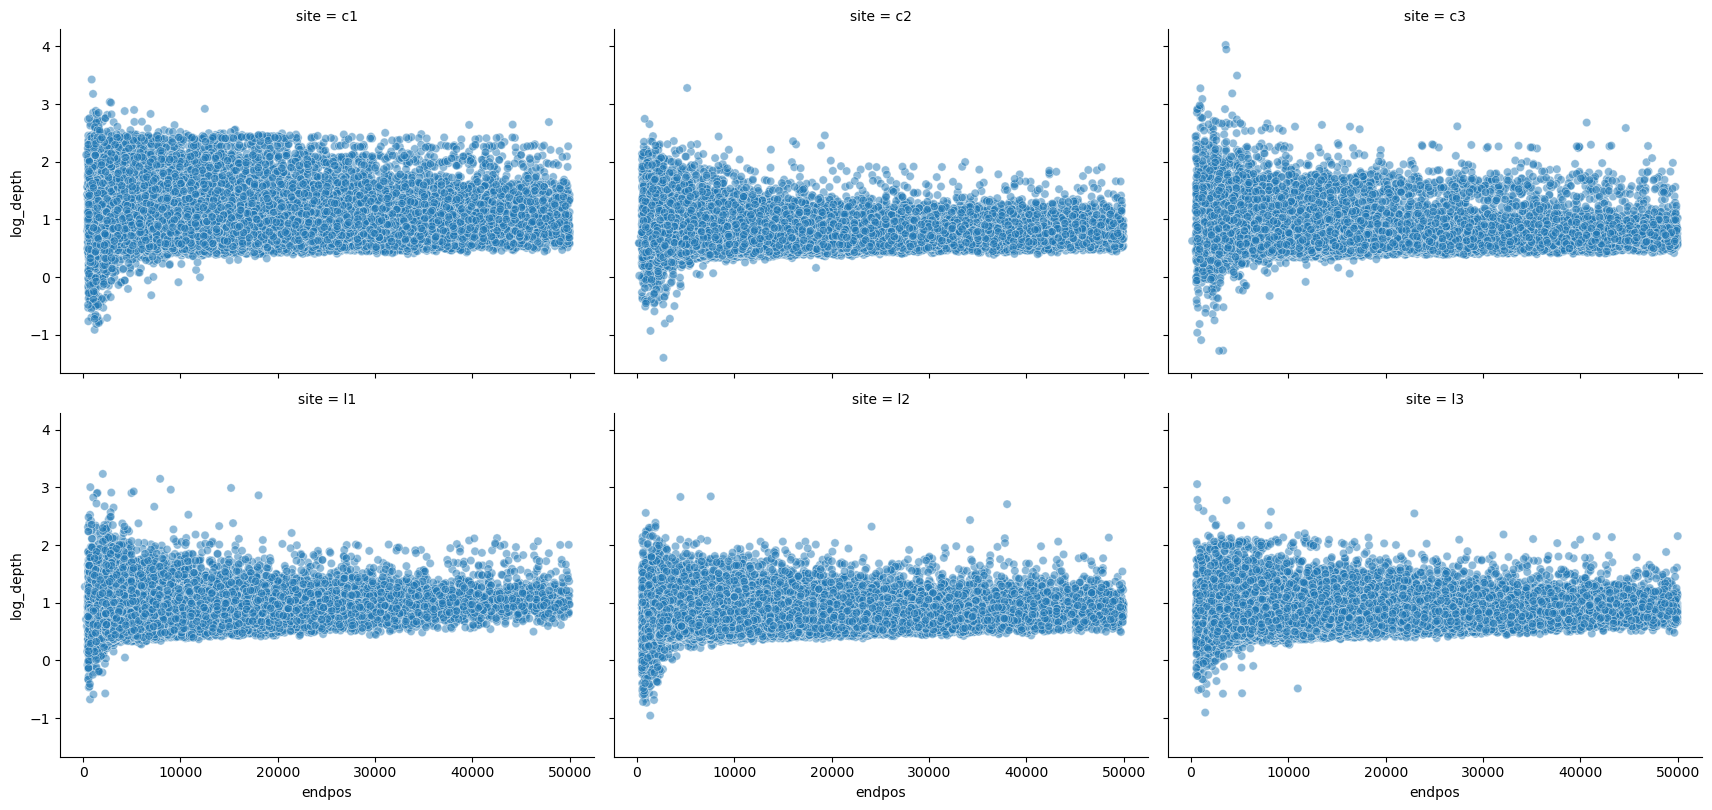

In [732]:
g = sns.FacetGrid(dfpaf_transformed[dfpaf_transformed["endpos"] < 50000] , col="site", height=4.1, aspect=1.4, col_wrap=3)
g.map(sns.scatterplot, "endpos", "log_depth", "site", alpha=0.5)

<Axes: xlabel='endpos', ylabel='meandepth'>

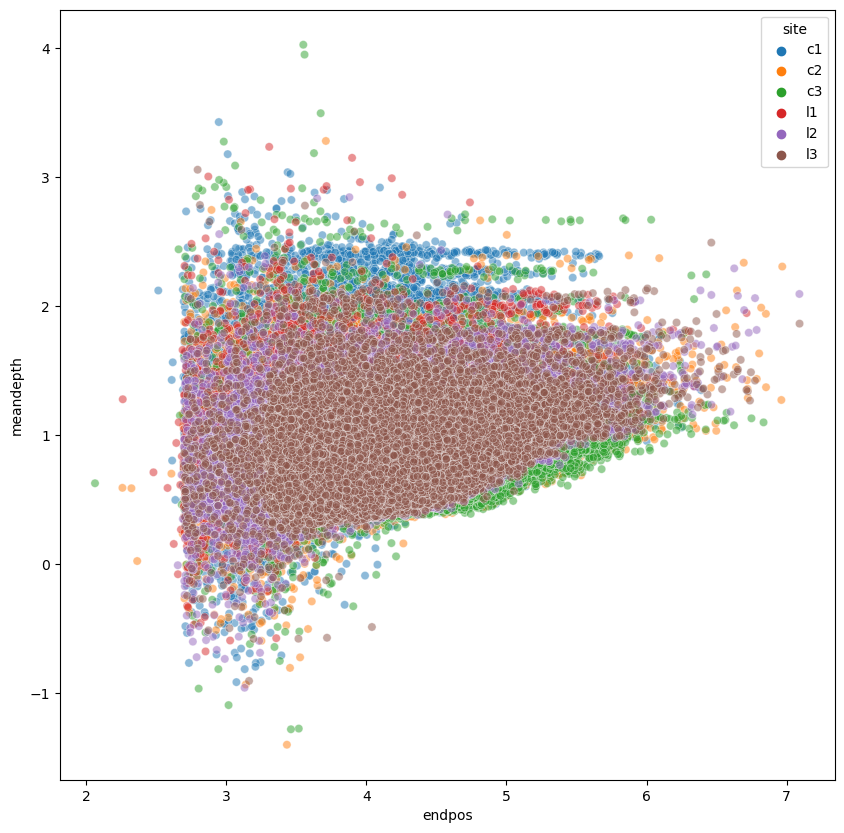

In [707]:

sns.scatterplot(data=dfpaf_transformed, x="endpos", y="meandepth", hue="site", alpha=0.5)


In [737]:
dfpaf_transformed = dfpaf.copy() 
dfpaf_transformed['log_depth'] = dfpaf_transformed['meandepth'].apply(np.log10)

dfpaf_transformed = dfpaf_transformed[dfpaf_transformed["endpos"] < 50000][['#rname', 'site', 'meandepth']]

In [738]:
dfpaf_transformed

,#rname,site,meandepth
0,contig_1,c1,12.17950
2,contig_10001,c1,5.79507
3,contig_10002,c1,108.79300
4,contig_10003,c1,34.29450
5,contig_10007,c1,34.90550
...,...,...,...
458163,contig_7673,l3,0.00000
458164,contig_794,l3,0.00000
458165,contig_8227,l3,0.00000
458166,contig_87847,l3,0.00000


In [740]:
dfpaf_transformed = dfpaf_transformed.replace(['c1', 'c2', 'c3', 'l1', 'l2', 'l3'],['C1', 'C2', 'C3', 'L1', 'L2', 'L3'])
dfpaf_transformed['id'] = dfpaf_transformed['site'] + "_" + dfpaf_transformed['#rname']
dfpaf_transformed

,#rname,site,meandepth,id
0,contig_1,C1,12.17950,C1_contig_1
2,contig_10001,C1,5.79507,C1_contig_10001
3,contig_10002,C1,108.79300,C1_contig_10002
4,contig_10003,C1,34.29450,C1_contig_10003
5,contig_10007,C1,34.90550,C1_contig_10007
...,...,...,...,...
458163,contig_7673,L3,0.00000,L3_contig_7673
458164,contig_794,L3,0.00000,L3_contig_794
458165,contig_8227,L3,0.00000,L3_contig_8227
458166,contig_87847,L3,0.00000,L3_contig_87847


In [735]:
dff = df_anno.copy()
dff = dff[["#query", "KEGG_ko", "site"]]
dff['id'] = dff['site'] + "_" + dff['#query'].str.split("_").str[:2].str.join("_") 
dff

# dff = dff.merge(dfpaf, on='id', how='left')
# dff = dff.dropna(subset=["KEGG_ko", "totalAvgDepth"])
# dff["KEGG_ko"] = dff["KEGG_ko"].str.split(",")
# dff = dff.explode("KEGG_ko")
# dff["KEGG_ko"] = dff["KEGG_ko"].str[3:]
# dff["count"] = dff[["id","KEGG_ko","totalAvgDepth", "site_y", "site_x"]].groupby(["site_y","KEGG_ko"]).transform('count')["id"]
# dff = dff[["id","KEGG_ko","totalAvgDepth", "site_y", "site_x", "count"]].drop_duplicates(ignore_index=True)
# dff["weight"] = dff["count"]*dff["totalAvgDepth"]
# dff = dff[["KEGG_ko","site_y", "weight"]].groupby(["KEGG_ko","site_y"]).sum()
# dff

,#query,KEGG_ko,site,id
0,contig_1_0,NaN,C1,C1_contig_1
1,contig_1_3,ko:K21572,C1,C1_contig_1
2,contig_1_6,NaN,C1,C1_contig_1
3,contig_1_5,NaN,C1,C1_contig_1
4,contig_1_8,NaN,C1,C1_contig_1
...,...,...,...,...
7243952,contig_99999_2,NaN,L3,L3_contig_99999
7243953,contig_99999_12,ko:K07736,L3,L3_contig_99999
7243954,contig_99999_5,ko:K18334,L3,L3_contig_99999
7243955,contig_99999_3,NaN,L3,L3_contig_99999


In [734]:
dff

,#query,KEGG_ko,site,id
0,contig_1_0,NaN,C1,C1_contig_1
1,contig_1_3,ko:K21572,C1,C1_contig_1
2,contig_1_6,NaN,C1,C1_contig_1
3,contig_1_5,NaN,C1,C1_contig_1
4,contig_1_8,NaN,C1,C1_contig_1
...,...,...,...,...
7243952,contig_99999_2,NaN,L3,L3_contig_99999
7243953,contig_99999_12,ko:K07736,L3,L3_contig_99999
7243954,contig_99999_5,ko:K18334,L3,L3_contig_99999
7243955,contig_99999_3,NaN,L3,L3_contig_99999


In [741]:
dff = dff.merge(dfpaf_transformed, on='id', how='left')
dff = dff.dropna(subset=["KEGG_ko", "meandepth"])
dff["KEGG_ko"] = dff["KEGG_ko"].str.split(",")
dff = dff.explode("KEGG_ko")
dff["KEGG_ko"] = dff["KEGG_ko"].str[3:]
dff["count"] = dff[["id","KEGG_ko","meandepth", "site_y", "site_x"]].groupby(["site_y","KEGG_ko"]).transform('count')["id"]
dff = dff[["id","KEGG_ko","meandepth", "site_y", "site_x", "count"]].drop_duplicates(ignore_index=True)
dff["weight"] = dff["count"]*dff["meandepth"]
dff = dff[["KEGG_ko","site_y", "weight"]].groupby(["KEGG_ko","site_y"]).sum()
dff

weight
KEGG_ko site_y              
K00001  C1      1.296354e+06
        C2      1.423813e+06
        C3      1.797115e+06
        L1      3.859186e+05
        L2      1.533389e+06
...                      ...
K22510  L1      7.674016e+01
        L3      1.500486e+01
K22511  C1      9.557460e+00
        L1      5.462121e+01
K22512  L1      5.462121e+01

[67100 rows x 1 columns]

In [742]:
dff = dff.reset_index()
dff.loc[dff["KEGG_ko"] == "K00001"]

,KEGG_ko,site_y,weight
0,K00001,C1,1.296354e+06
1,K00001,C2,1.423813e+06
2,K00001,C3,1.797115e+06
3,K00001,L1,3.859186e+05
4,K00001,L2,1.533389e+06
5,K00001,L3,1.438129e+06


In [743]:
dff.to_csv("/home/gladkovgpu/metagenome/rnf_c_new/semibin/kegg_df.csv")

## 16 - barrnap

kernel utils

In [5]:
!mafft --help

------------------------------------------------------------------------------
  MAFFT v7.520 (2023/Mar/22)
  https://mafft.cbrc.jp/alignment/software/
  MBE 30:772-780 (2013), NAR 30:3059-3066 (2002)
------------------------------------------------------------------------------
High speed:
  % mafft in > out
  % mafft --retree 1 in > out (fast)

High accuracy (for <~200 sequences x <~2,000 aa/nt):
  % mafft --maxiterate 1000 --localpair  in > out (% linsi in > out is also ok)
  % mafft --maxiterate 1000 --genafpair  in > out (% einsi in > out)
  % mafft --maxiterate 1000 --globalpair in > out (% ginsi in > out)

If unsure which option to use:
  % mafft --auto in > out

--op # :         Gap opening penalty, default: 1.53
--ep # :         Offset (works like gap extension penalty), default: 0.0
--maxiterate # : Maximum number of iterative refinement, default: 0
--clustalout :   Output: clustal format, default: fasta
--reorder :      Outorder: aligned, default: input order
--quiet :      

In [4]:
!grep -c 16S /home/gladkovgpu/metagenome/rnf_c_new/semibin/barrnap/*.fasta

/home/gladkovgpu/metagenome/rnf_c_new/semibin/barrnap/c1_bin.0.fasta:3
/home/gladkovgpu/metagenome/rnf_c_new/semibin/barrnap/c1_bin.103.fasta:0
/home/gladkovgpu/metagenome/rnf_c_new/semibin/barrnap/c1_bin.11.fasta:0
/home/gladkovgpu/metagenome/rnf_c_new/semibin/barrnap/c1_bin.12.fasta:2
/home/gladkovgpu/metagenome/rnf_c_new/semibin/barrnap/c1_bin.15.fasta:2
/home/gladkovgpu/metagenome/rnf_c_new/semibin/barrnap/c1_bin.16.fasta:1
/home/gladkovgpu/metagenome/rnf_c_new/semibin/barrnap/c1_bin.17.fasta:2
/home/gladkovgpu/metagenome/rnf_c_new/semibin/barrnap/c1_bin.18.fasta:0
/home/gladkovgpu/metagenome/rnf_c_new/semibin/barrnap/c1_bin.19.fasta:0
/home/gladkovgpu/metagenome/rnf_c_new/semibin/barrnap/c1_bin.2.fasta:0
/home/gladkovgpu/metagenome/rnf_c_new/semibin/barrnap/c1_bin.20.fasta:2
/home/gladkovgpu/metagenome/rnf_c_new/semibin/barrnap/c1_bin.21.fasta:1
/home/gladkovgpu/metagenome/rnf_c_new/semibin/barrnap/c1_bin.22.fasta:0
/home/gladkovgpu/metagenome/rnf_c_new/semibin/barrnap/c1_bin.23.f